In [1]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
from tqdm.notebook import tqdm
import time
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import kwant
import math
from math import  sqrt
import cmath
from numpy.lib.scimath import sqrt as csqrt
import scipy
from scipy.optimize import fsolve
import copy
from itertools import repeat

import numba
from numba import jit

In [2]:
import DEDliblog

100%|██████████| 20000/20000 [1:33:09<00:00,  3.58it/s]


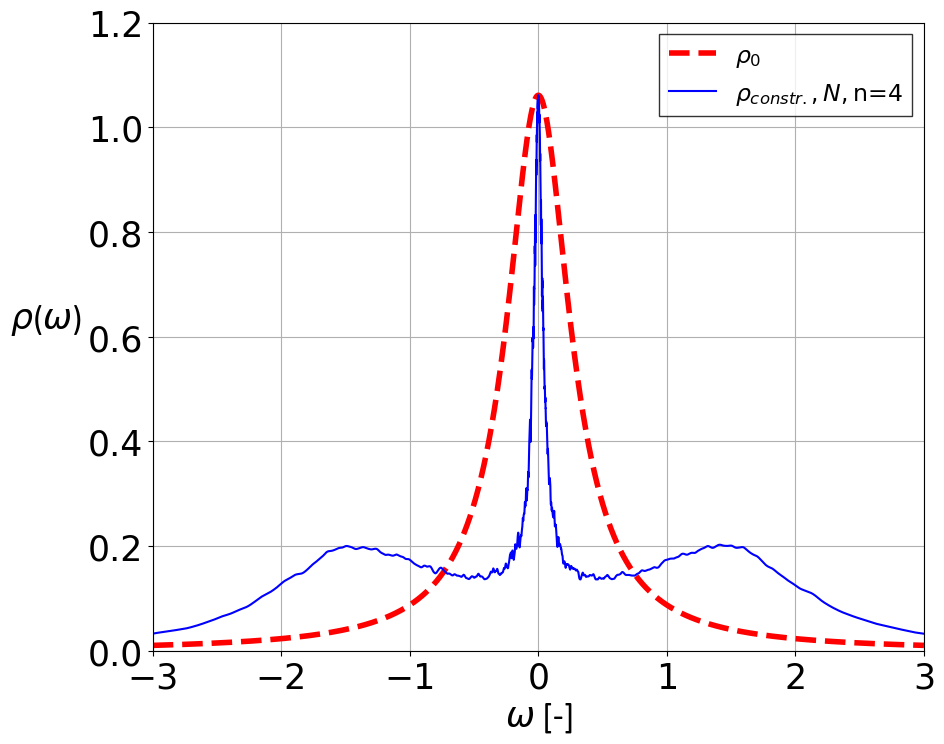

In [3]:
input=[{"N" : 2000, "poles" : 2, "Ed" : -3/2, "ctype" : 'n'},
{"N" : 2000, "poles" : 3, "Ed" : -3/2, "ctype" : 'n'},
{"N" : 20000, "poles" : 4, "Ed" : -3/2, "ctype" : 'n'},
{"N" : 2000, "poles" : 5, "Ed" : -3/2, "ctype" : 'n'},
{"N" : 200, "poles" : 6, "Ed" : -3/2, "ctype" : 'n'},
{"N" : 2000, "poles" : 4, "Ed" : -3/2, "ctype" : ' '},
{"N" : 2000, "poles" : 4, "Ed" : -3/2, "ctype" : 'n%2'}]
filenames,labelnames=['constraintN2p','constraintN3p','constraintN4p','constraintN5p','constraintN6p','noconstraintN4p','constraint%2N4p'],['$\\rho_{constr.},N,$n=2','$\\rho_{constr.},N,$n=3','$\\rho_{constr.},N,$n=4','$\\rho_{constr.},N,$n=5','$\\rho_{constr.},N,$n=6','$\\rho_{no constr.},$n=4','$\\rho_{constr.},$$N\\%$2,n=4']
i=2
file=filenames[i]
nd, _, fDOS, Lor, omega, selectpT, selectpcT=DEDliblog.main(**input[i])
DEDliblog.DOSplot(fDOS, Lor, omega,file,labelnames[i])
DEDliblog.textfileW(omega,np.ravel(selectpT),np.ravel(selectpcT),fDOS,file)

In [25]:
np.log(3)/np.log(2)

1.5849625007211563

In [10]:
omega=np.concatenate((-np.logspace(np.log(3)/np.log(1.5),-40,10000,base=1.5),np.logspace(-40,np.log(3)/np.log(1.5),10000,base=1.5)))
omega[0:20]

array([-3.        , -2.99480881, -2.98962661, -2.98445337, -2.97928908,
       -2.97413373, -2.9689873 , -2.96384978, -2.95872115, -2.95360139,
       -2.94849049, -2.94338843, -2.9382952 , -2.93321079, -2.92813517,
       -2.92306834, -2.91801027, -2.91296096, -2.90792038, -2.90288853])

In [11]:
omega[9995:10005]

array([-9.10664165e-08, -9.09088355e-08, -9.07515273e-08, -9.05944912e-08,
       -9.04377268e-08,  9.04377268e-08,  9.05944912e-08,  9.07515273e-08,
        9.09088355e-08,  9.10664165e-08])

In [7]:
np.linspace(-3,3,1001)[0:30]

array([-3.   , -2.994, -2.988, -2.982, -2.976, -2.97 , -2.964, -2.958,
       -2.952, -2.946, -2.94 , -2.934, -2.928, -2.922, -2.916, -2.91 ,
       -2.904, -2.898, -2.892, -2.886, -2.88 , -2.874, -2.868, -2.862,
       -2.856, -2.85 , -2.844, -2.838, -2.832, -2.826])

In [9]:
np.linspace(-3,3,1001)[495:505]

array([-0.03 , -0.024, -0.018, -0.012, -0.006,  0.   ,  0.006,  0.012,
        0.018,  0.024])

100%|██████████| 2000/2000 [3:40:57<00:00,  6.63s/it]  


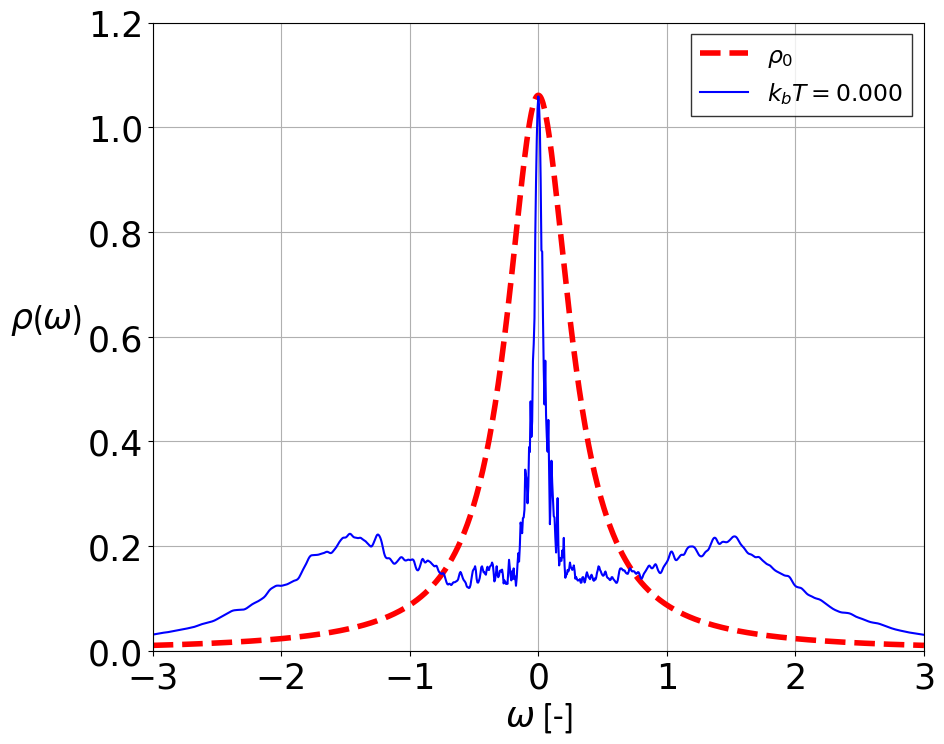

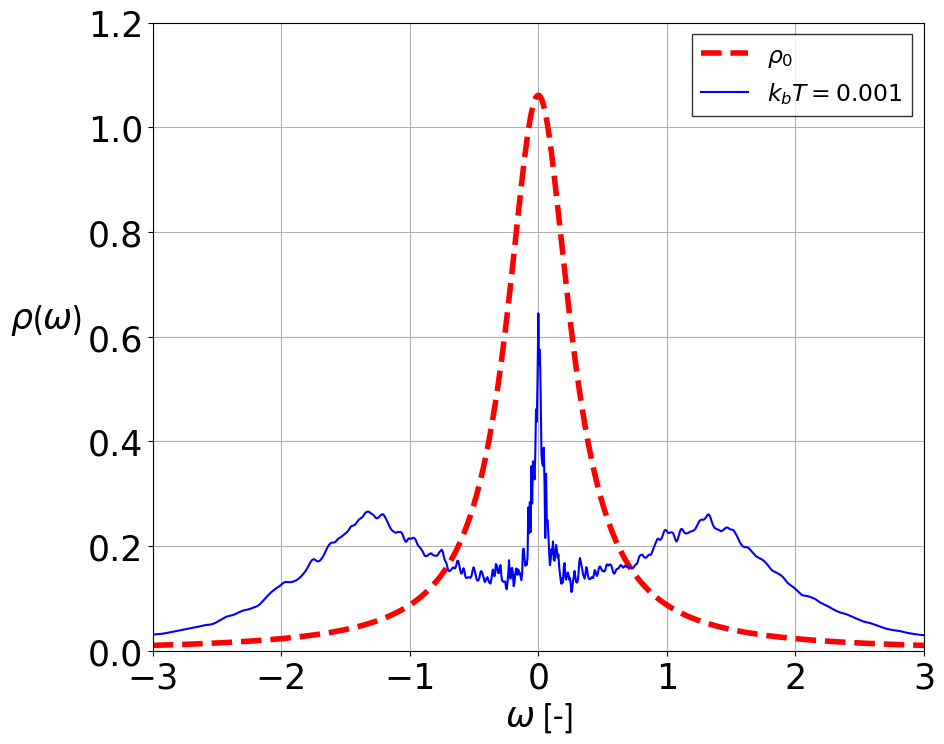

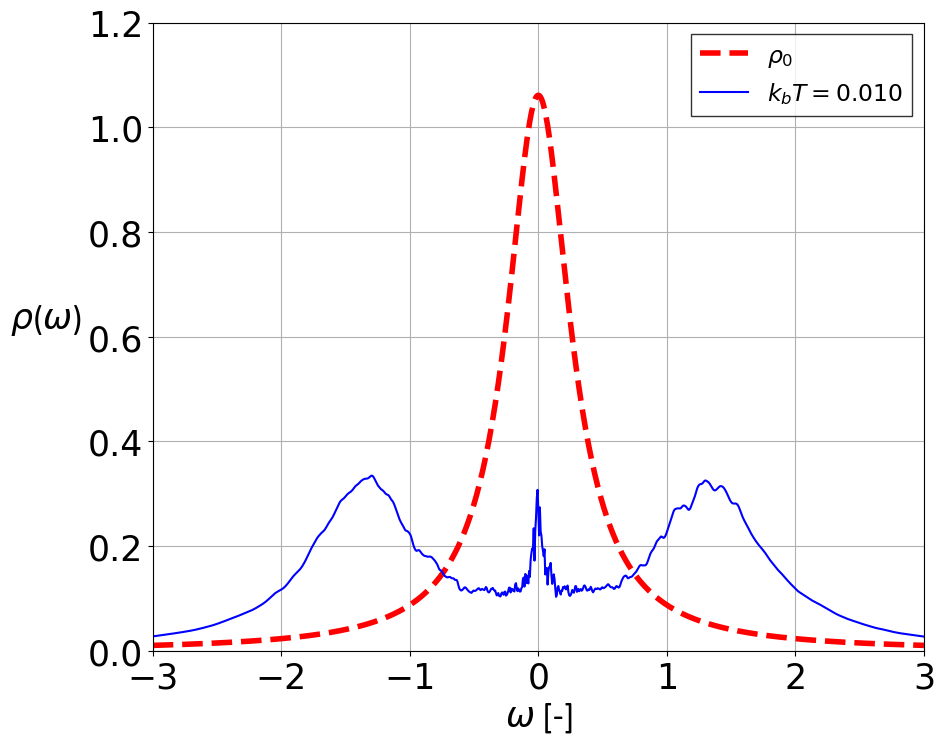

IndexError: index 3 is out of bounds for axis 0 with size 3

In [3]:
input={"N" : 2000, "poles" : 4, "Ed" : -3/2, "etaco" : [0.02,1e-24], "ctype" : 'n', "Tk" : [0.000000000001,0.1,1]}
filenames,labelnames=['cN4pT1e-12','cN4pT1e-3','cN4pT1e-2','cN4pT1e-1','cN4pT1'],['$\it{k_bT= %.3f}$'%0.000,'$\it{k_bT= %.3f}$'%0.001,'$\it{k_bT= %.3f}$'%0.010,'$\it{k_bT= %.3f}$'%0.100,'$\it{k_bT= %.3f}$'%1.000]
nd, _, fDOS, Lor, omega, selectpT, selectpcT=DEDlib.main(**input)
for i,file in enumerate(filenames):
    DEDlib.DOSplot(fDOS[i], Lor, omega,file,labelnames[i])
    DEDlib.textfileW(omega,np.ravel(selectpT),np.ravel(selectpcT),fDOS[i],file)
DEDlib.DOSmultiplot(omega,np.tile(omega, (len(input["Tk"]),1)),fDOS,np.tile(len(omega), len(input["Tk"])),labelnames,'Ttotal',Lor)

100%|██████████| 2000/2000 [20:22<00:00,  1.64it/s]


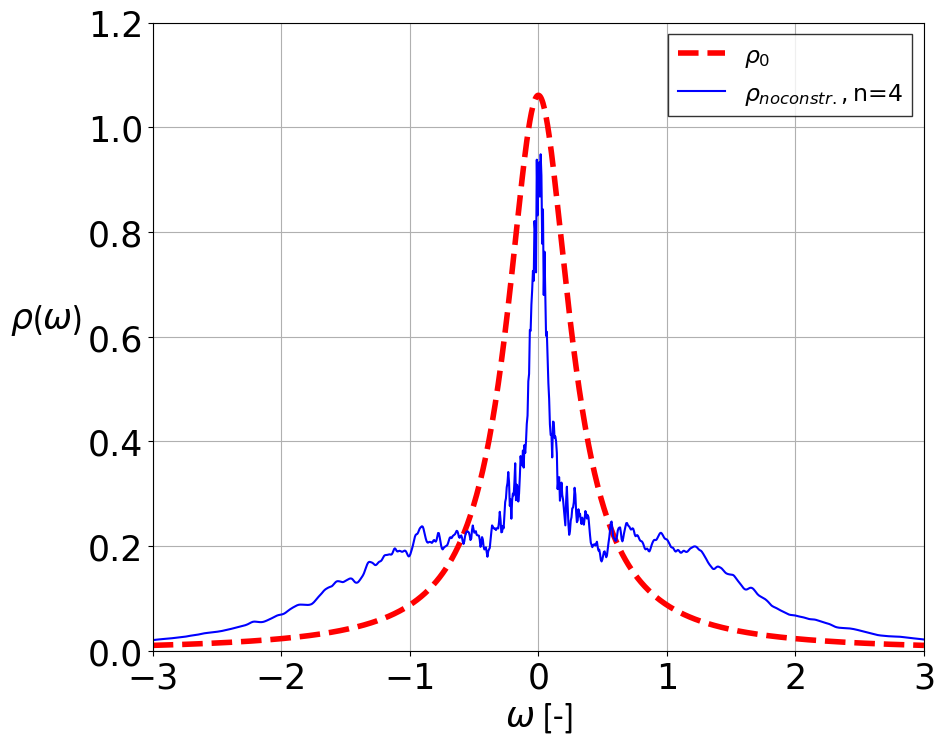

<module 'matplotlib.pyplot' from 'c:\\Users\\roelv\\OneDrive\\Documenten\\VSC\\.conda\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [5]:
input=[{"N" : 20000, "poles" : 2, "Ed" : -3/2, "ctype" : 'n'},
    {"N" : 200000, "poles" : 3, "Ed" : -3/2, "ctype" : 'n'},
    {"N" : 2000, "poles" : 4, "Ed" : -3/2, "ctype" : 'n'},
    {"N" : 200000, "poles" : 5, "Ed" : -3/2, "ctype" : 'n'},
    {"N" : 20000, "poles" : 6, "Ed" : -3/2, "ctype" : 'n'},
    {"N" : 2000, "poles" : 5, "Ed" : -3/2, "ctype" : ' '},
    {"N" : 200000, "poles" : 4, "Ed" : -3/2, "ctype" : 'n%2'}]
filenames,labelnames=['constraintN2p','constraintN3p','constraintN4p','constraintN5p','constraintN6p','noconstraintN4p','constraint%2N4p'],['$\\rho_{constr.},N,$n=2','$\\rho_{constr.},N,$n=3','$\\rho_{constr.},N,$n=4','$\\rho_{constr.},N,$n=5','$\\rho_{constr.},N,$n=6','$\\rho_{no constr.},$n=4','$\\rho_{constr.},$$N\\%$2,n=4']
i=5
file=filenames[i]
nd, _, fDOS, Lor, omega, selectpT, selectpcT=DEDlib.main(**input[i])
DEDlib.DOSplot(fDOS, Lor, omega,file,labelnames[i])

In [6]:
1!=2

True

In [4]:
N = 1000
poles = 7
U = 3
Sigma = 3/2
Gamma = 0.3
SizeO = 1001
omega= np.linspace(-3,3,SizeO)
AvgSigmadat=np.zeros(len(omega),dtype = 'complex_')
AvgSigma=np.zeros(len(omega),dtype = 'complex_')
AvgSigmadat2=np.zeros(len(omega),dtype = 'complex_')
lattice_length = 2+2*(poles-1)
c = []
for i in range(lattice_length):
    c.append(jordan_wigner_transform(i, lattice_length))
n=0
for i in range(lattice_length):
    n+=c[i].dag()*c[i]
t = time.time()
select=sorted(Lorentzian(omega, Gamma, poles)[1])
NewM=startrans(poles,select,0,0)
bathenergy=[]
impenergy=NewM[0][0]
for k in range(len(NewM)-1):
    bathenergy.append(NewM[k+1][k+1])
Vkk=NewM[0,1:]
eta=0.02*abs(omega)+0.000000000000000000000001



H = 0
for i in range(2):
        H += impenergy * (c[i].dag() * c[i])
        for j in range(len(bathenergy)):
            H += Vkk[j] * (c[i].dag() * c[2 * j + i + 2] + c[2 * j + i + 2].dag() * c[i])
            H += bathenergy[j] * (c[2 * j + i + 2].dag() * c[2 * j + i + 2])
H += U * (c[0].dag() * c[0] * c[1].dag() * c[1])
H += -Sigma * (c[0].dag() * c[0] + c[1].dag() * c[1])

In [5]:
H.data.shape[0]

16384

In [6]:
scipy.sparse.linalg.eigsh(np.real(H.data), k=H.data.shape[0]-500, which='LM',tol=0.01)#, which='SA'

KeyboardInterrupt: 

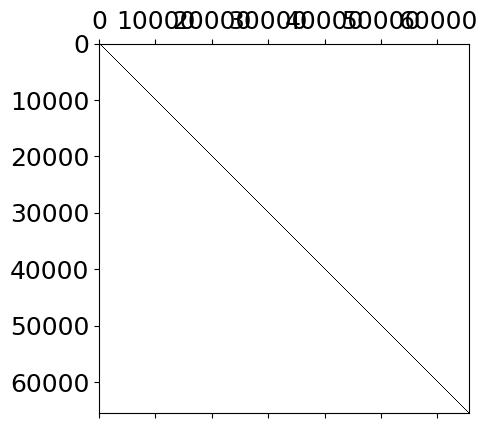

In [75]:
plt.spy(H.data.toarray())

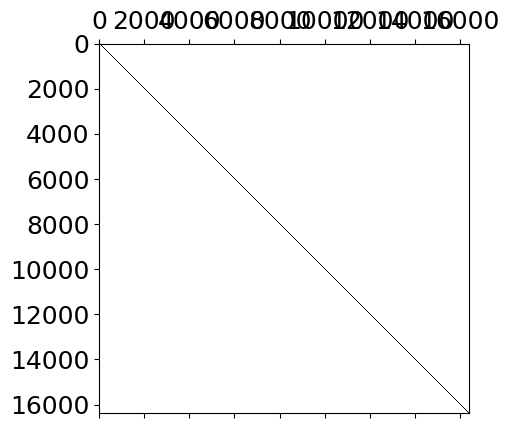

In [79]:
plt.spy(H.data.toarray())

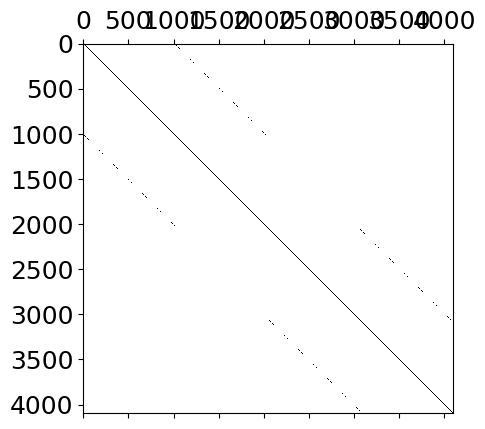

In [77]:
plt.spy(H.data.toarray())

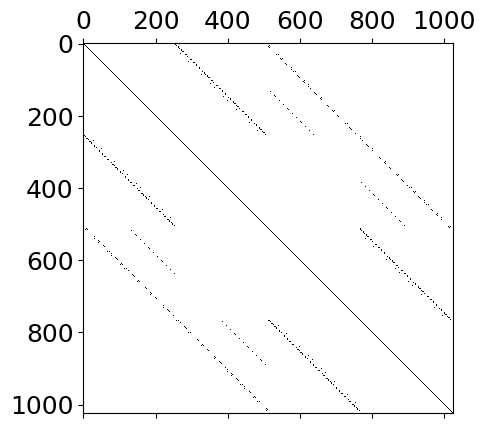

In [39]:
plt.spy(H.data.toarray())

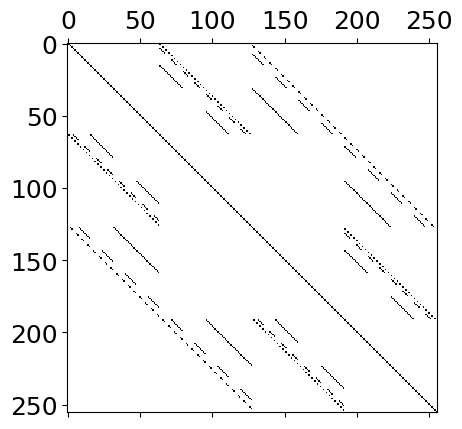

In [35]:
plt.spy(H.data.toarray())

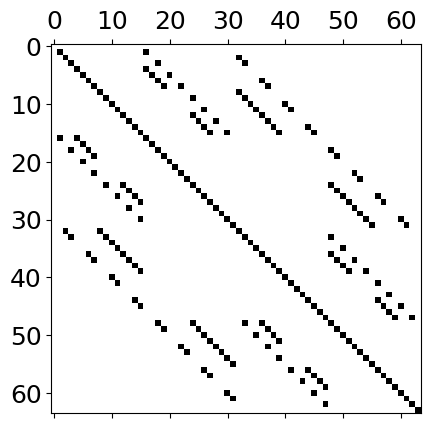

In [45]:
plt.spy(H.data.toarray())

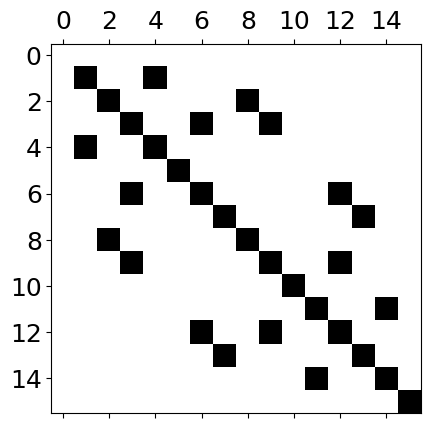

In [62]:
plt.spy(H.data.toarray())

In [73]:
H.data.toarray()[11:,:4]

array([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

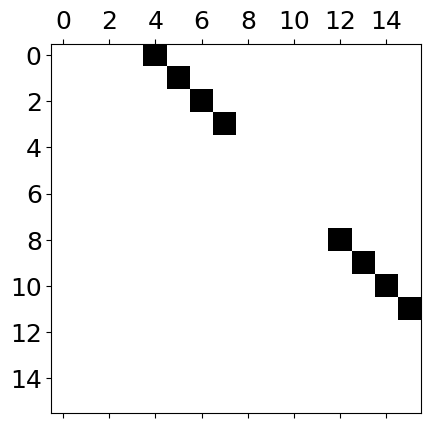

In [63]:
plt.spy(c[1])

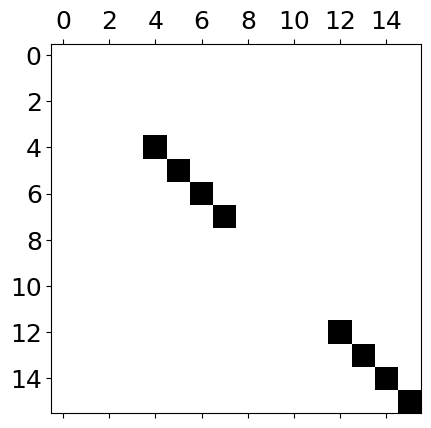

In [69]:
plt.spy(c[1].dag()*c[1])

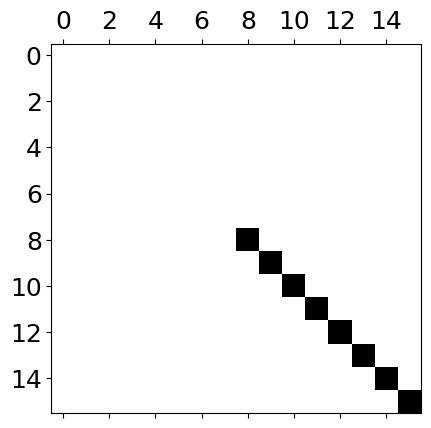

In [70]:
plt.spy(c[0].dag()*c[0])

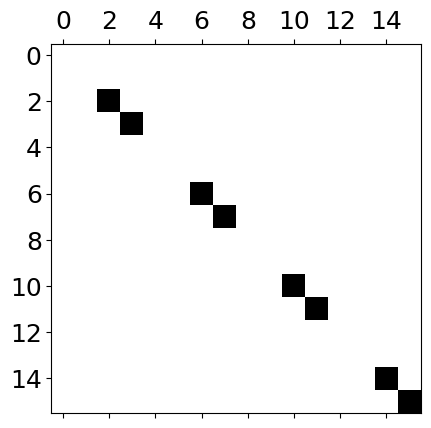

In [71]:
plt.spy(c[2].dag()*c[2])

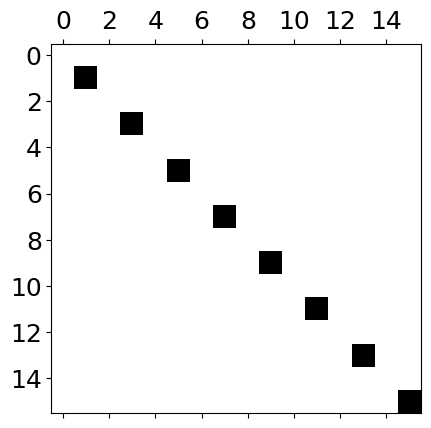

In [72]:
plt.spy(c[3].dag()*c[3])

In [ ]:
0,1=dup
2,3=ddown
4,5=e1up
6,7=e1down
8,9=e2up
10,11=e3up
12,

In [22]:
16/4

4.0

In [23]:
Ho=H.data.toarray()

In [87]:
np.identity(H.data.shape[0])

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [88]:
scipy.sparse.linalg.lobpcg(H.data,np.identity(H.data.shape[0]))

C:\Users\roelv\AppData\Local\Temp\ipykernel_27788\1317319295.py:1: UserWarning: The problem size 16384 minus the constraints size 0 is too small relative to the block size 16384. Using a dense eigensolver instead of LOBPCG.
  scipy.sparse.linalg.lobpcg(H.data,np.identity(H.data.shape[0]))


(array([ 0.33559888,  0.30592332,  0.30592332, ..., -9.82348619,
        -9.82348619, -9.92391328]),
 array([[ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         ...,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
          0.00000000e+00+0.j],
        [ 1.80609504e-22+0.j,  1.65483363e-24+0.j, -7.55859149e-31+0.j,
         ...,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         -0.00000000e+00+0.j],
        [-8.97737898e-17+0.j, -7.58670634e-17+0.j,  6.68745623e-18+0.j,
         ...,  3.36616443e-32+0.j,  2.19947218e-32+0.j,
          9.99076159e-33+0.j],
        ...,
        [ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         ...,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
          0.00000000e+00+0.j],
        [ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         ...,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
          0.00000000e+00+0.j],
        [ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         ...,  0.00

In [32]:
scipy.sparse.linalg.spilu(H.data)

c:\Users\roelv\OneDrive\Documenten\VSC\.conda\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:411: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


RuntimeError: [0]: matrix is singular at line 150 in file C:\bld\scipy_1658811084897\work\scipy\sparse\linalg\_dsolve\SuperLU\SRC\ilu_zpivotL.c


In [33]:
scipy.sparse.linalg.svds(H.data)

(array([[ 1.94289029e-16+3.05311332e-16j, -1.05065296e-16+1.54854448e-16j,
          2.70616862e-16-1.11022302e-16j,  6.59194921e-17+9.36750677e-17j,
         -1.00063729e-16-1.31285443e-19j,  1.59594560e-16+1.11022302e-16j],
        [ 3.27862737e-16+9.02056208e-17j,  6.41713836e-17+1.74297641e-16j,
          2.35922393e-16+2.28983499e-16j,  1.11022302e-16+7.97972799e-17j,
         -2.74570793e-16-1.42677685e-18j,  1.17961196e-16-1.94289029e-16j],
        [-1.10588622e-16-2.60208521e-18j,  1.54789307e-16-1.15192873e-16j,
         -2.08166817e-16+1.70002901e-16j,  3.46944695e-18+3.12250226e-17j,
         -3.33040774e-17-2.18484825e-16j,  1.73472348e-16+8.32667268e-17j],
        [-2.81658371e-16-5.69287353e-16j, -1.39170533e-17-1.70128954e-16j,
         -1.70205160e-15+3.12522468e-16j, -1.01017665e-01-1.22276399e-01j,
          2.21197868e-18+9.25415606e-17j, -3.17865906e-16-5.31941257e-17j],
        [ 5.42968448e-16+3.19189120e-16j, -1.31664061e-17+1.03658329e-16j,
         -1.00613962e

In [26]:
Ho[4:7,:],Ho[8:11,:]=Ho[8:11,:],Ho[4:7,:]


In [28]:
Ho[:,4:7],Ho[:,8:11]=Ho[:,8:11],Ho[:,4:7]

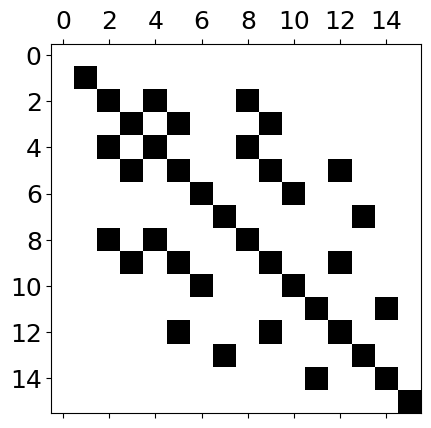

In [29]:
plt.spy(Ho)

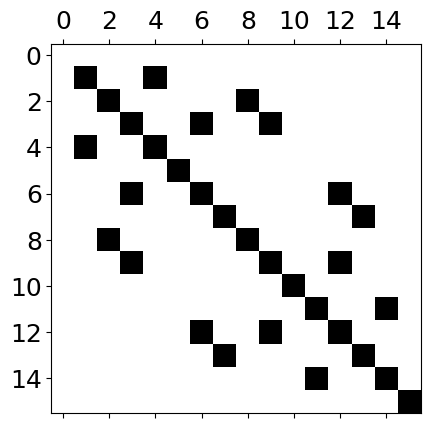

In [24]:
plt.spy(Ho)

100%|██████████| 2000/2000 [03:31<00:00,  9.47it/s]


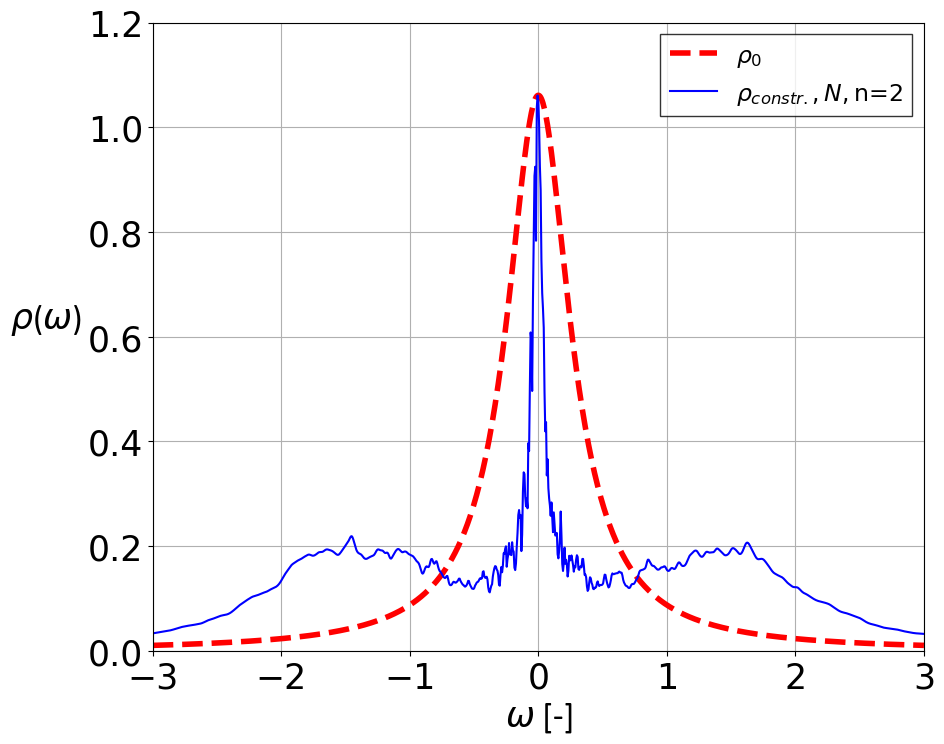

In [3]:
input=[{"N" : 2000, "poles" : 4, "ctype" : 'n'},
{"N" : 200000, "poles" : 4, "ctype" : 'n'},
{"N" : 20000, "poles" : 6, "ctype" : 'n'},
{"N" : 200000, "poles" : 4,  "ctype" : ' '},#, "Ed" : -3/2
{"N" : 200000, "poles" : 4, "ctype" : 'n%2'}]
filenames,labelnames=['constraintN2p','constraintN','constraintN6p','noconstraintN','constraint%2N'],['$\\rho_{constr.},N,$n=2','$\\rho_{constr.},N,$n=4','$\\rho_{constr.},N,$n=6','$\\rho_{no constr.},$n=4','$\\rho_{constr.},$$N\\%$2,n=4']
i=0
file=filenames[i]
nd, _, fDOS, Lor, omega, selectpT, selectpcT=DEDlib.main(**input[i])
DEDlib.DOSplot(fDOS, Lor, omega,file,labelnames[i])
DEDlib.textfileW(omega,np.ravel(selectpT),np.ravel(selectpcT),fDOS,file)

In [5]:
nd

0.9996359886963971

In [40]:
print(labelnames)

[b'\x18' b'-' b'D' b'T' b'\xfb' b'!' '' b'@']


In [39]:
input=[{"N" : 2000, "poles" : 4, "Ed" : -2, "Sigma" : 1.5, "ctype" : 'n'},
{"N" : 2000, "poles" : 4, "Ed" : -2.5, "Sigma" : 1.5, "ctype" : 'n'},
{"N" : 2000, "poles" : 4, "Ed" : -3, "Sigma" : 1.5, "ctype" : 'n'}]
filenames=['cN4p-2Ed','cN4p-2.5Ed','cN4p-3Ed']

i=0
file=filenames[i]
reset,DOST,labelnames,j=False,np.zeros((8,1001),dtype = 'float'),np.chararray(8),0

100%|██████████| 2000/2000 [03:21<00:00,  9.93it/s]


<module 'matplotlib.pyplot' from 'c:\\Users\\roelv\\OneDrive\\Documenten\\VSC\\.conda\\lib\\site-packages\\matplotlib\\pyplot.py'>

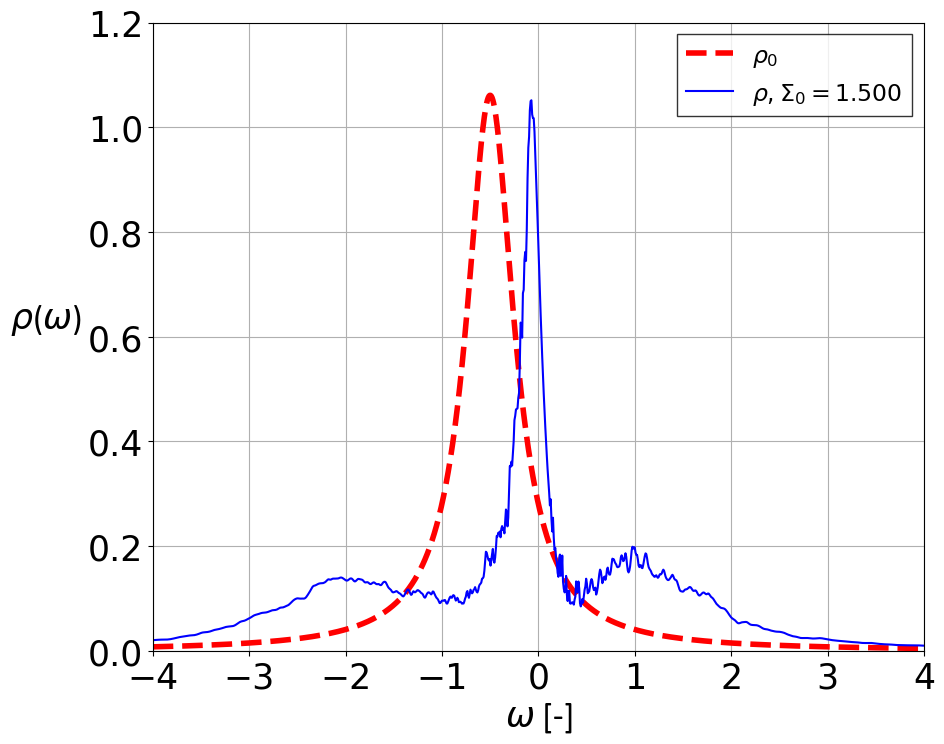

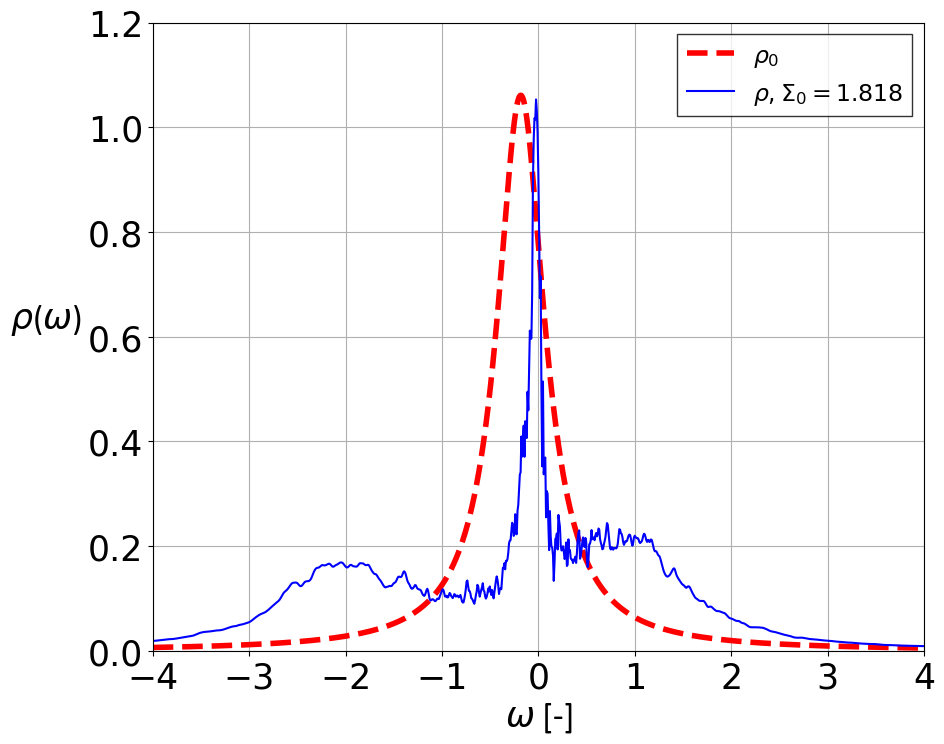

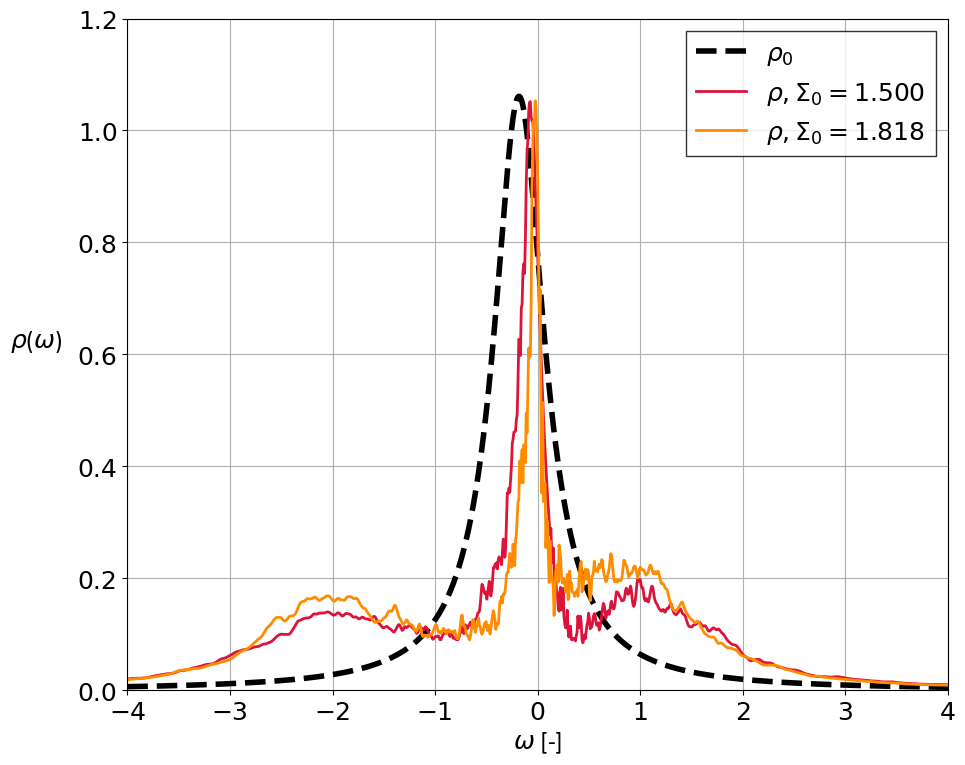

In [3]:
input=[{"N" : 2000, "poles" : 4, "Ed" : -1.5, "Sigma" : 1.5, "ctype" : 'n', "bound" : 4},
       {"N" : 2000, "poles" : 4, "Ed" : -1.65, "Sigma" : 1.5, "ctype" : 'n', "bound" : 4},
       {"N" : 2000, "poles" : 4, "Ed" : -1.8, "Sigma" : 1.5, "ctype" : 'n', "bound" : 4},
       {"N" : 20000, "poles" : 4, "Ed" : -2, "Sigma" : 1.5, "ctype" : 'n', "bound" : 4},
{"N" : 2000, "poles" : 4, "Ed" : -2.5, "Sigma" : 1.5, "ctype" : 'n', "bound" : 4},
{"N" : 2000, "poles" : 4, "Ed" : -3, "Sigma" : 1.5, "ctype" : 'n', "bound" : 4}]
filenames=['cN4p-1_5Ed','cN4p-1_65Ed','cN4p-1_8Ed','cN4p-2Ed','cN4p-2_5Ed','cN4p-3Ed']
#for i,file in enumerate(filenames):
i=3
file=filenames[i]
DOST,labelnames,nd=np.zeros((8,1001),dtype = 'float'),np.chararray(8, itemsize=23),np.zeros(8,dtype = 'float')
for j,_ in enumerate(DOST):
    (nd[j], NewSigma, DOST[j], Lor, omega, selectpT, selectpcT),labelnames[j]=DEDlib.main(**input[i]),'$\\rho,\\Sigma_0=%.3f$'%input[i]['Sigma']
    DEDlib.DOSplot(DOST[j], Lor, omega,file+'%.16fSigma'%input[i]['Sigma'],'$\\rho,\\Sigma_0=%.3f$'%input[i]['Sigma'])
    DEDlib.textfileW(omega,np.ravel(selectpT),np.ravel(selectpcT),DOST[j],file+'%.16fSigma'%input[i]['Sigma'])
    if np.isclose(input[i]['Sigma'],np.real(NewSigma[500]),rtol=5e-4, atol=1e-06):
        break
    break
    input[i]['Sigma']=np.real(NewSigma[500])
np.savetxt(file+'%.16fSigma'%input[i]['Sigma']+'nd',nd,delimiter='\t', newline='\n')
DEDlib.DOSmultiplot(omega,np.tile(omega, (j+1,1)),DOST[~np.all(DOST == 0, axis=1)],np.tile(len(omega), j+1),labelnames.astype(str),'Asymtotal'+filenames[i],input[i]['Ed'],input[i]['Sigma'])

In [4]:
nd

array([1.12100636, 1.10920548, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

100%|██████████| 2000/2000 [03:11<00:00, 10.45it/s]


<module 'matplotlib.pyplot' from 'c:\\Users\\roelv\\OneDrive\\Documenten\\VSC\\.conda\\lib\\site-packages\\matplotlib\\pyplot.py'>

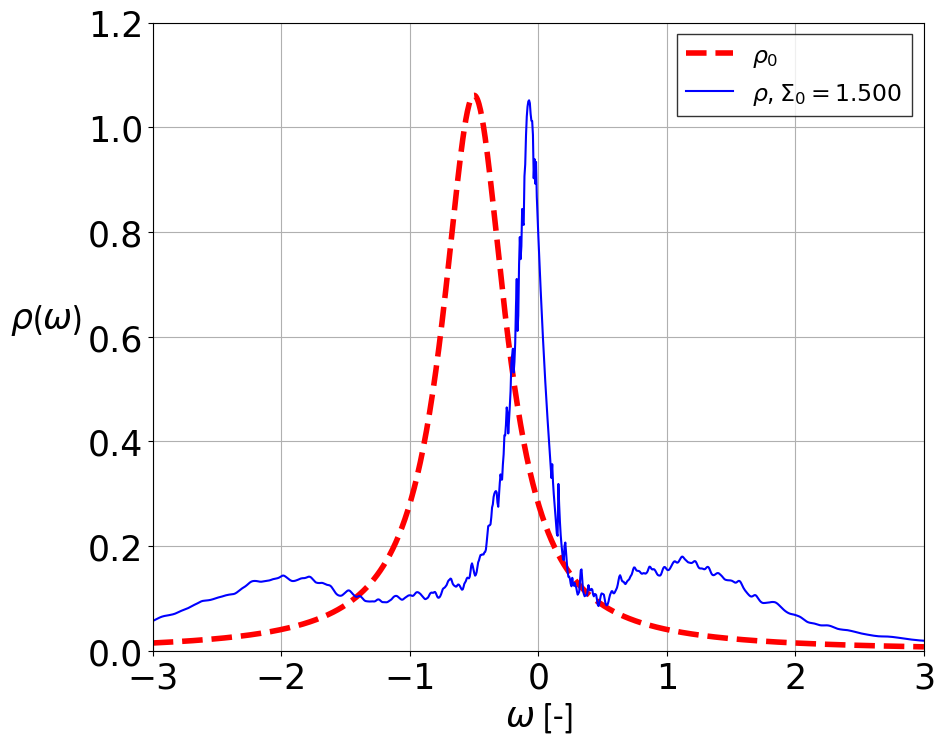

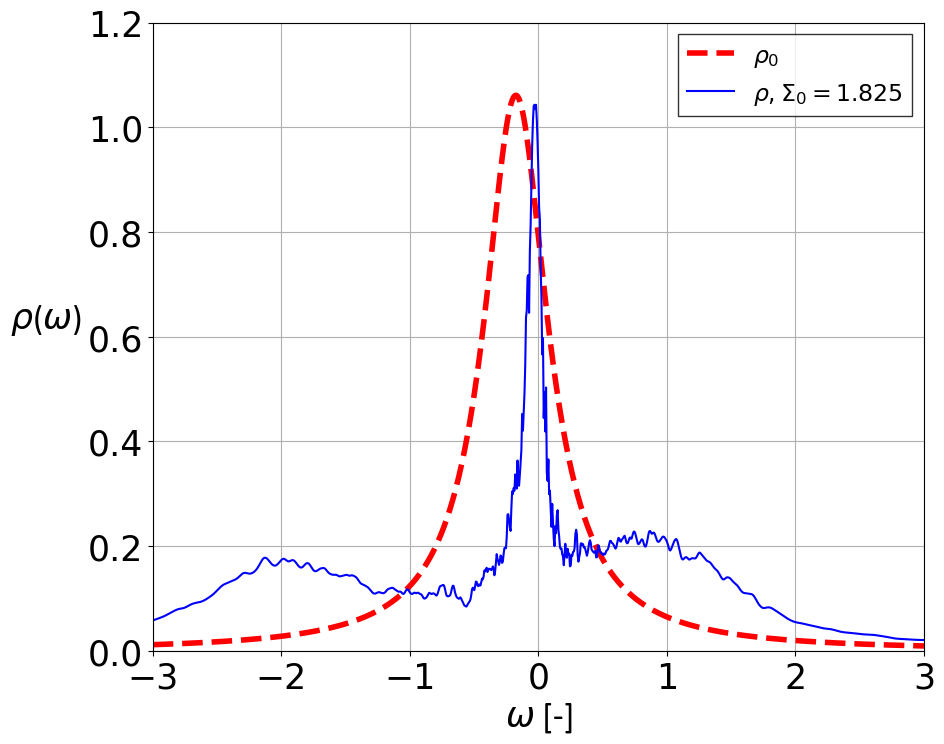

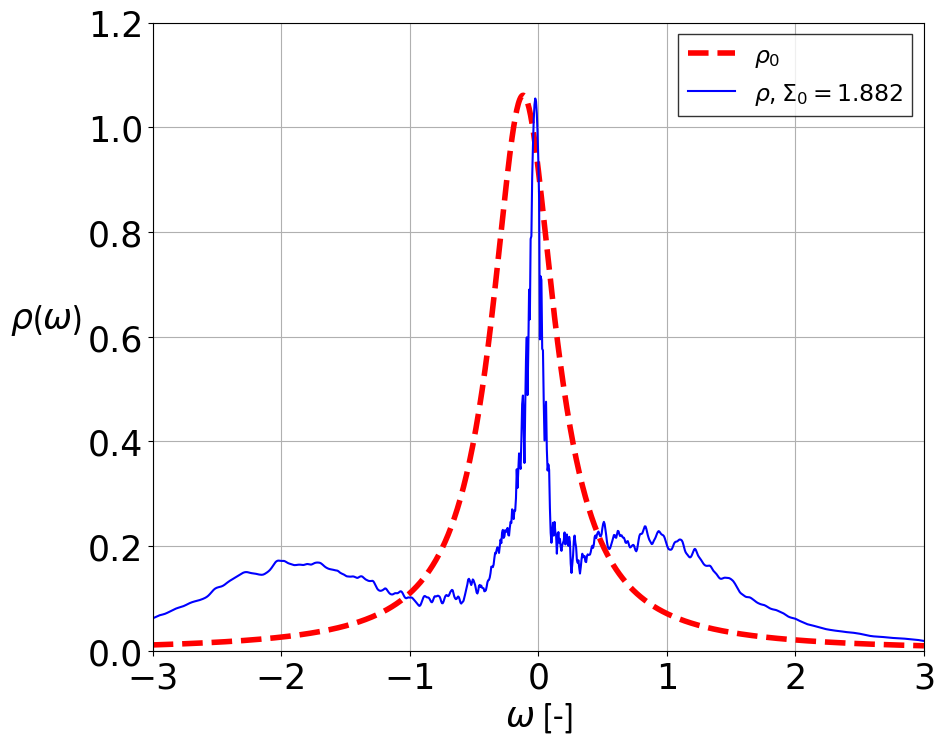

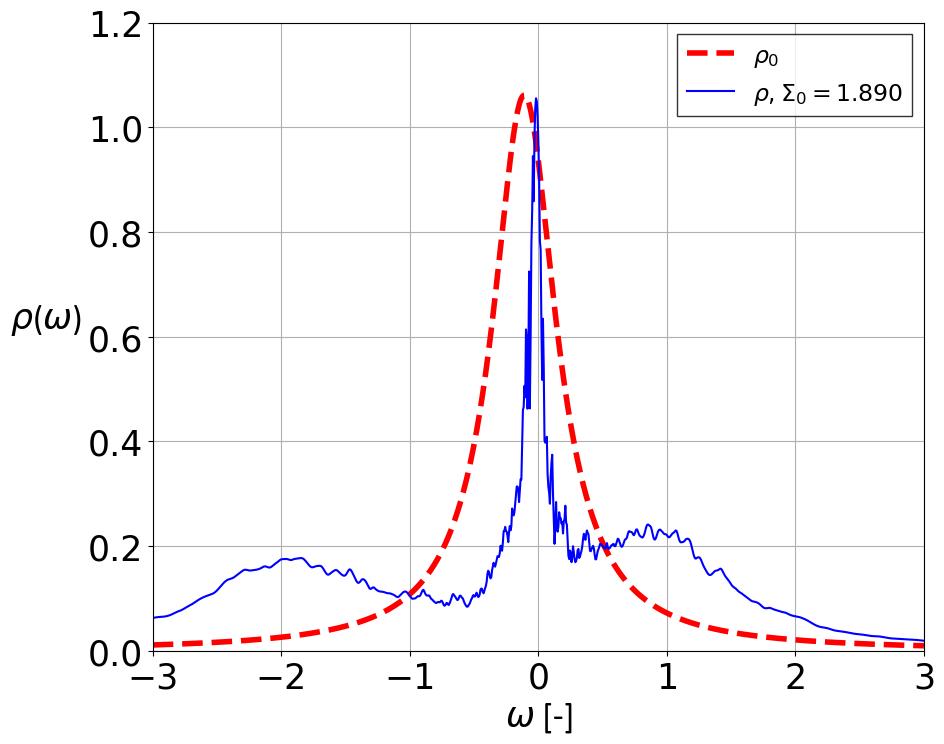

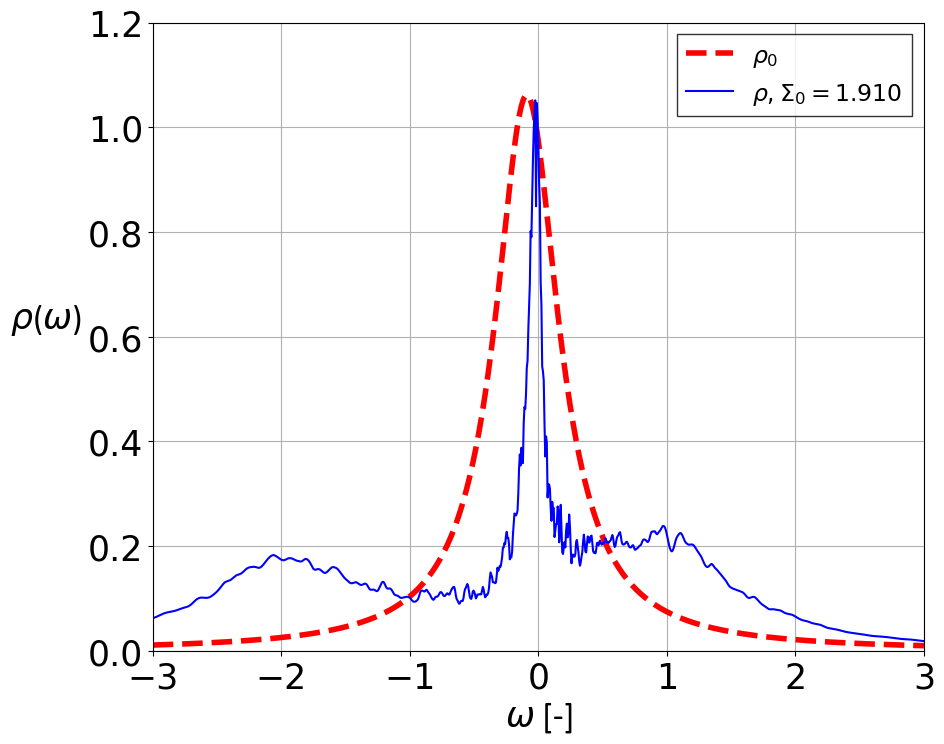

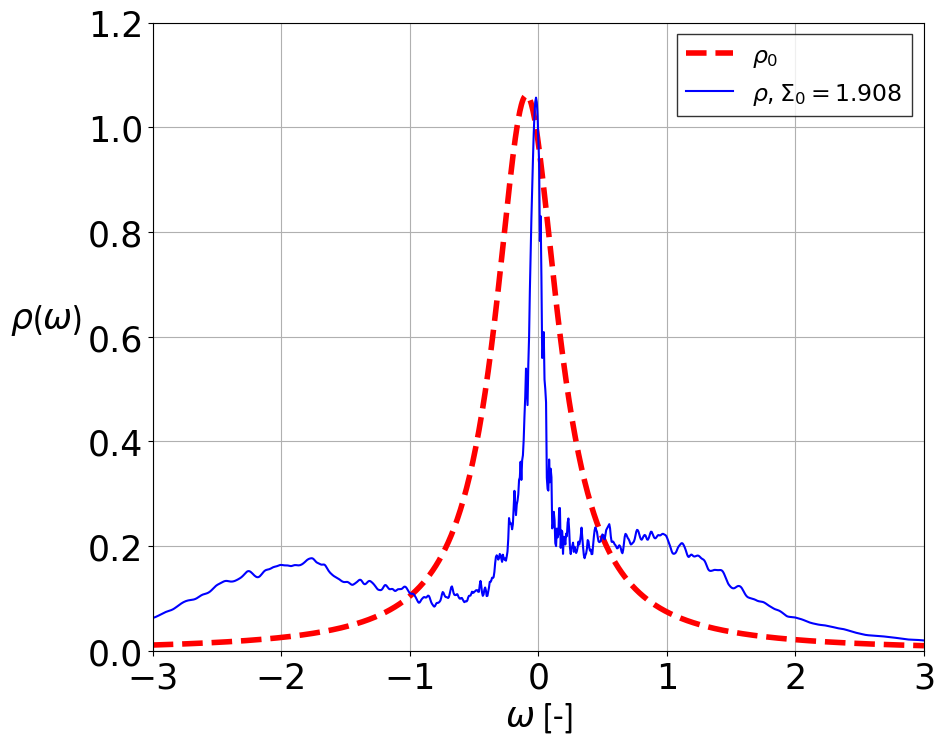

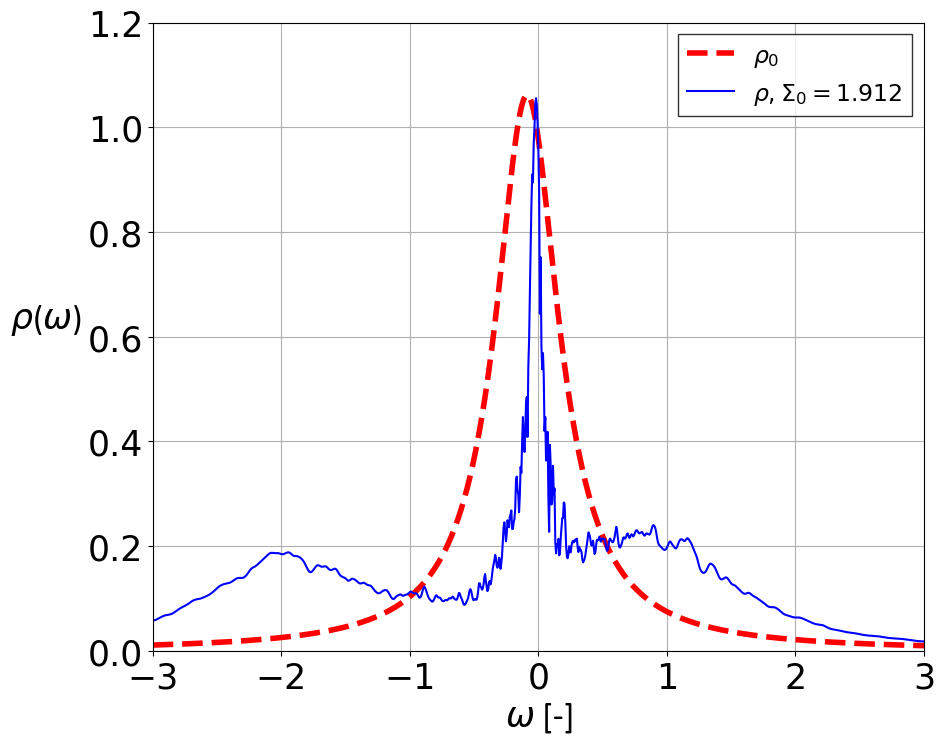

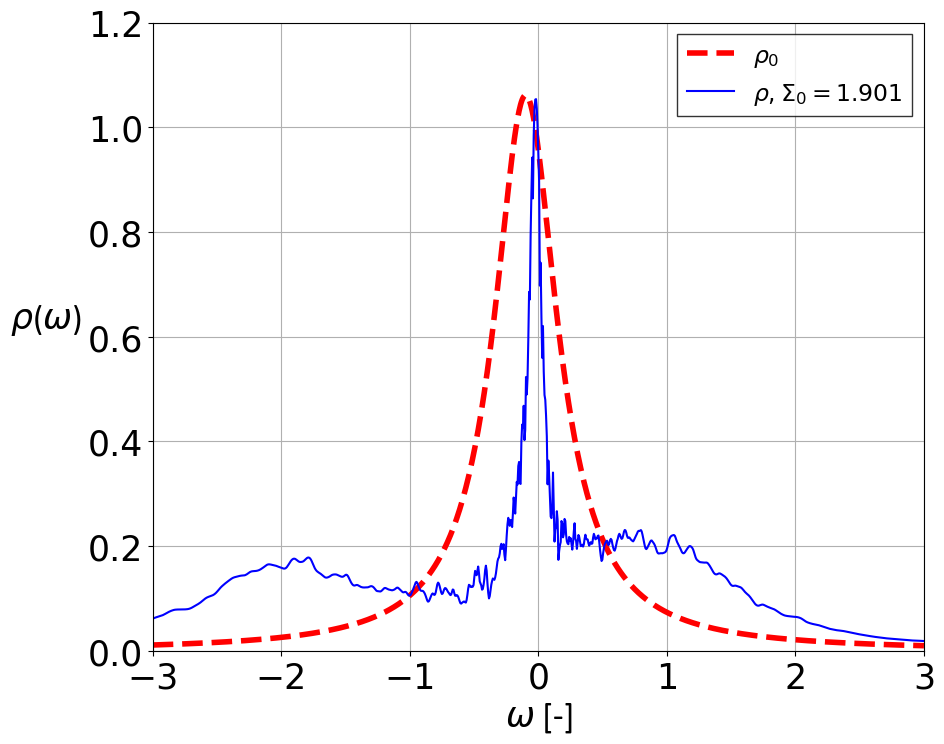

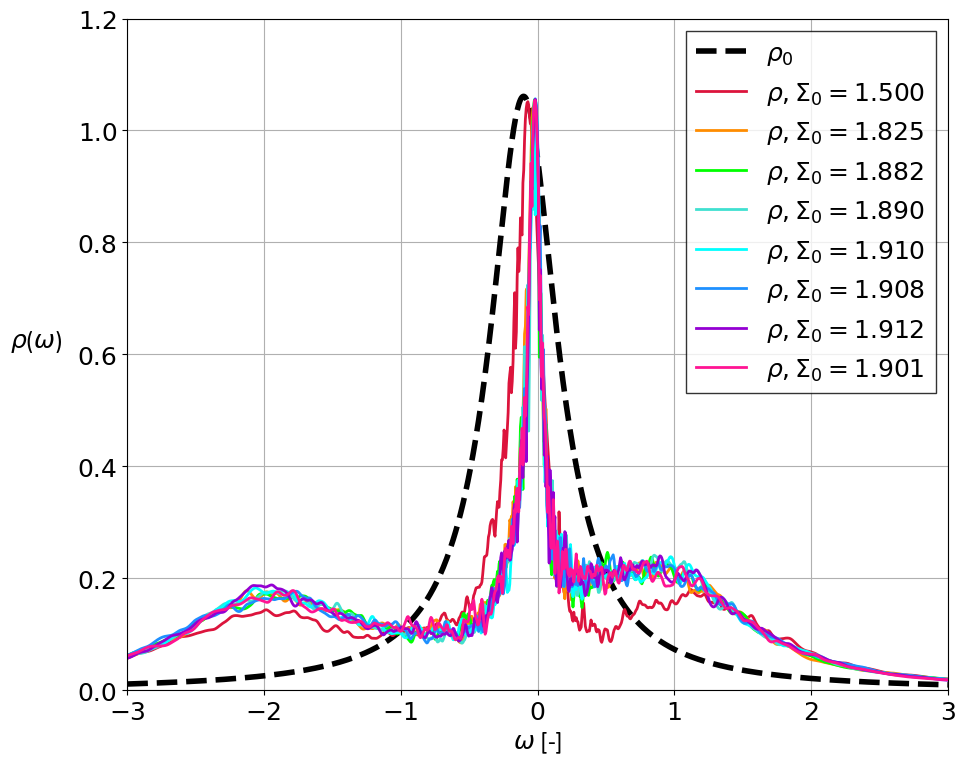

In [72]:
input=[{"N" : 2000, "poles" : 4, "Ed" : -2, "Sigma" : 1.5, "ctype" : 'n'},
{"N" : 2000, "poles" : 4, "Ed" : -2.5, "Sigma" : 1.5, "ctype" : 'n'},
{"N" : 2000, "poles" : 4, "Ed" : -3, "Sigma" : 1.5, "ctype" : 'n'}]
filenames=['cN4p-2Ed','cN4p-2.5Ed','cN4p-3Ed']
#for i,file in enumerate(filenames):
i=0
file=filenames[i]
reset,DOST,labelnames,j=False,np.zeros((8,1001),dtype = 'float'),np.chararray(8, itemsize=23),0#np.full(8,' ', dtype=str)
while not reset and j<8:
    nd, NewSigma, DOST[j], Lor, omega, selectpT, selectpcT=DEDlib.main(**input[i])
    DEDlib.DOSplot(DOST[j], Lor, omega,file+'%.16fSigma'%input[i]['Sigma'],'$\\rho,\\Sigma_0=%.3f$'%input[i]['Sigma'])
    DEDlib.textfileW(omega,np.ravel(selectpT),np.ravel(selectpcT),DOST[j],file+'%.16fSigma'%input[i]['Sigma'])
    if np.isclose(input[i]['Sigma'],np.real(NewSigma[500]),rel_tol=5e-4, atol=1e-06):
        reset=True
        print('reset')
    input[i]['Sigma'],labelnames[j],j=np.real(NewSigma[500]),'$\\rho,\\Sigma_0=%.3f$'%input[i]['Sigma'],j+1
DEDlib.DOSmultiplot(omega,np.tile(omega, (j,1)),DOST[~np.all(DOST == 0, axis=1)],np.tile(len(omega), j),labelnames.astype(str),'Asymtotal'+filenames[i],input[i]['Ed'],input[i]['Sigma'])


100%|██████████| 200000/200000 [2:49:33<00:00, 19.66it/s]  


(1.4752691140758014-2.2809544400257355e-05j)


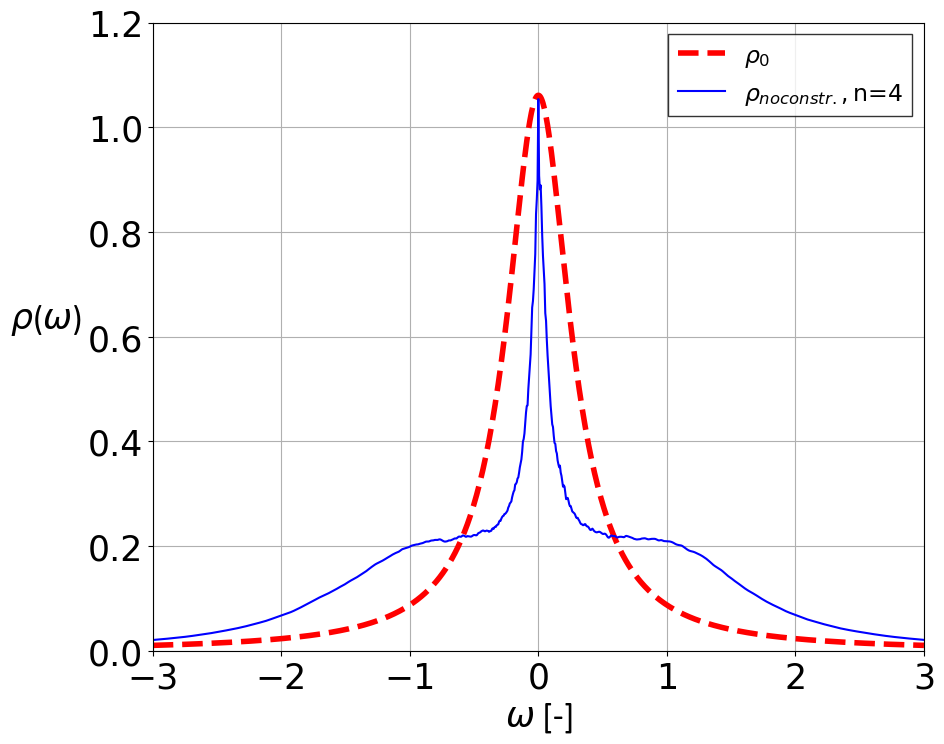

In [3]:
input=[{"N" : 4000, "poles" : 2, "ctype" : 'n'},
    {"N" : 1, "poles" : 6, "ctype" : 'n'},
    {"N" : 200000, "poles" : 4, "Ed" : -3/2, "ctype" : ' '},
    {"N" : 100, "poles" : 4, "ctype" : 'n%2'}]
filenames,labelnames=['constraintN2p','constraintNp','noconstraintN','constraint%2N'],['$\\rho_{constr.}, N,$n=2','$\\rho_{constr.}, N,$n=6','$\\rho_{no constr.},$n=4','$\\rho_{constr.},$ $N\\%$2,n=4']
i=2
file=filenames[i]
AvgSigmadat,fDOS, Lor, omega, selectpT, selectpcT=DEDlib.main(**input[i])
print(AvgSigmadat[500])
DEDlib.DOSplot(fDOS, Lor, omega,file,labelnames[i])
DEDlib.textfileW(omega,np.ravel(selectpT),np.ravel(selectpcT),fDOS,file)

  0%|          | 0/4000 [00:00<?, ?it/s]

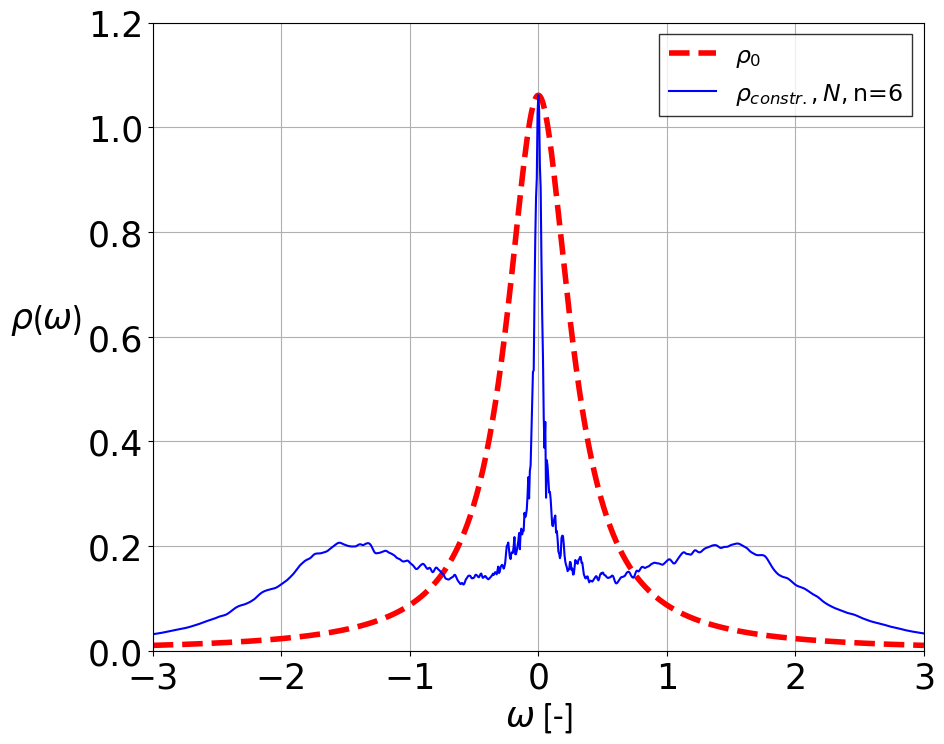

In [3]:
input=[{"N" : 1000, "poles" : 2, "ctype" : 'n'},
    {"N" : 4000, "poles" : 6, "ctype" : 'n'},
    {"N" : 200, "poles" : 4,  "ctype" : ' '},
    {"N" : 100, "poles" : 4, "ctype" : 'n%2'}]
filenames,labelnames=['constraintN2p','constraintN6p','noconstraintN','constraint%2N'],['$\\rho_{constr.}, N,$n=2','$\\rho_{constr.}, N,$n=6','$\\rho_{no constr.},$n=4','$\\rho_{constr.},$ $N\\%$2,n=4']
i=1
file=filenames[i]
fDOS, Lor, omega, selectpT, selectpcT=DEDlib.main(**input[i])
DEDlib.DOSplot(fDOS, Lor, omega,file,labelnames[i])
DEDlib.textfileW(omega,np.ravel(selectpT),np.ravel(selectpcT),fDOS,file)

100%|██████████| 100/100 [00:20<00:00,  4.98it/s]


<module 'matplotlib.pyplot' from 'c:\\Users\\roelv\\OneDrive\\Documenten\\VSC\\.conda\\lib\\site-packages\\matplotlib\\pyplot.py'>

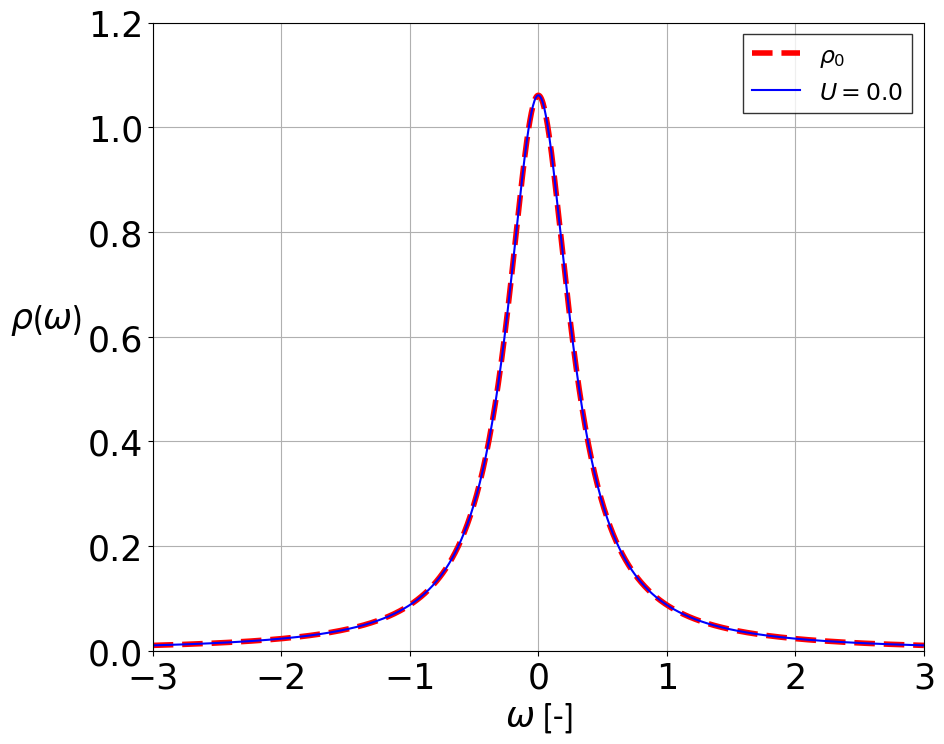

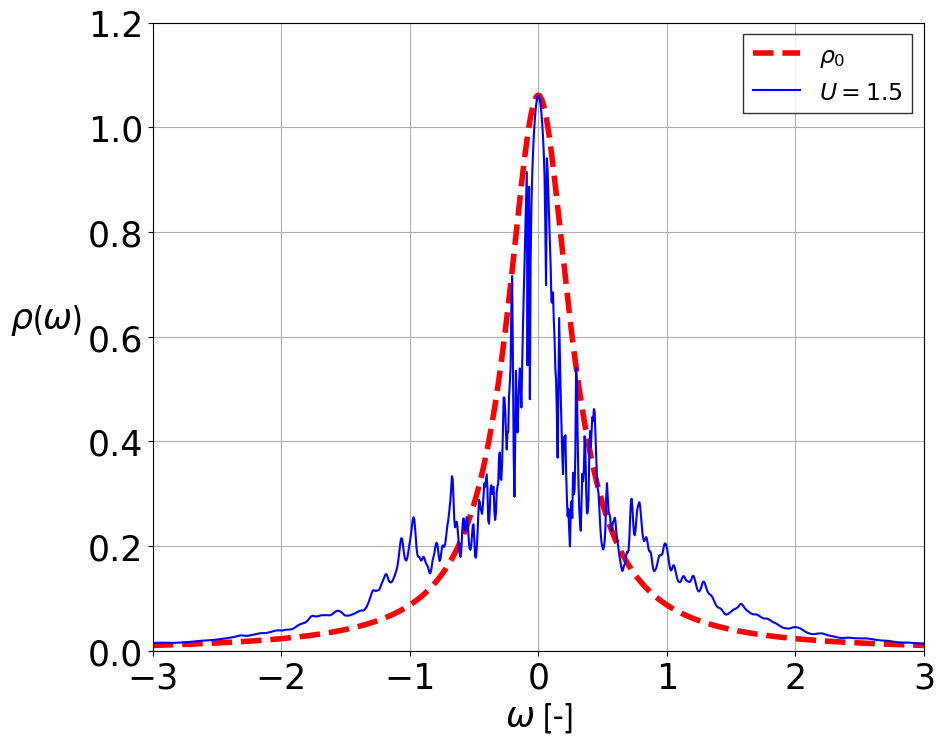

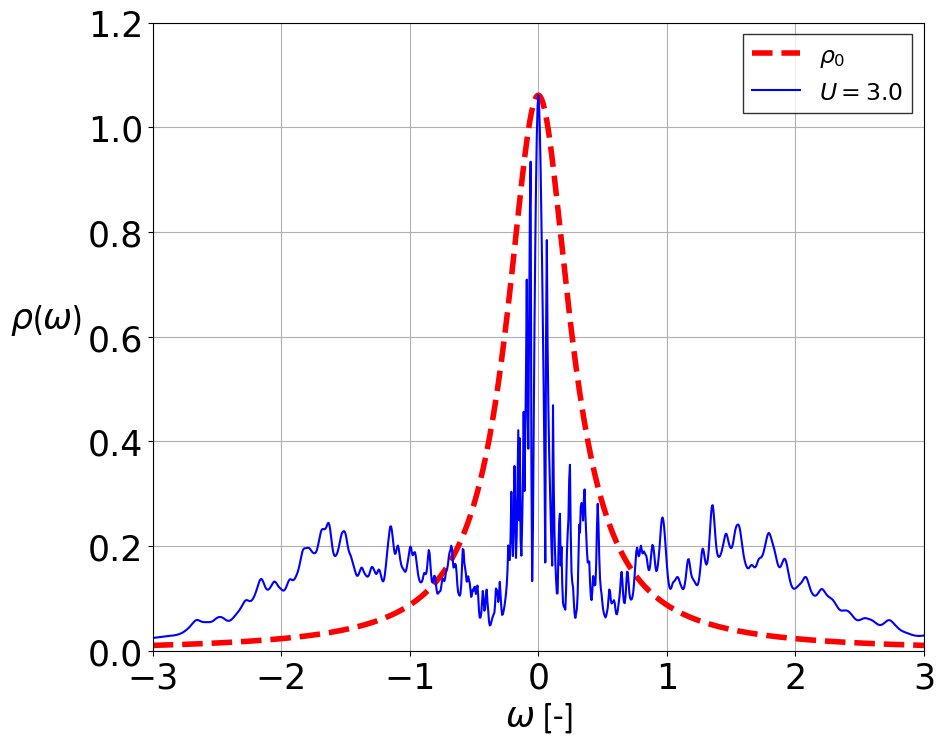

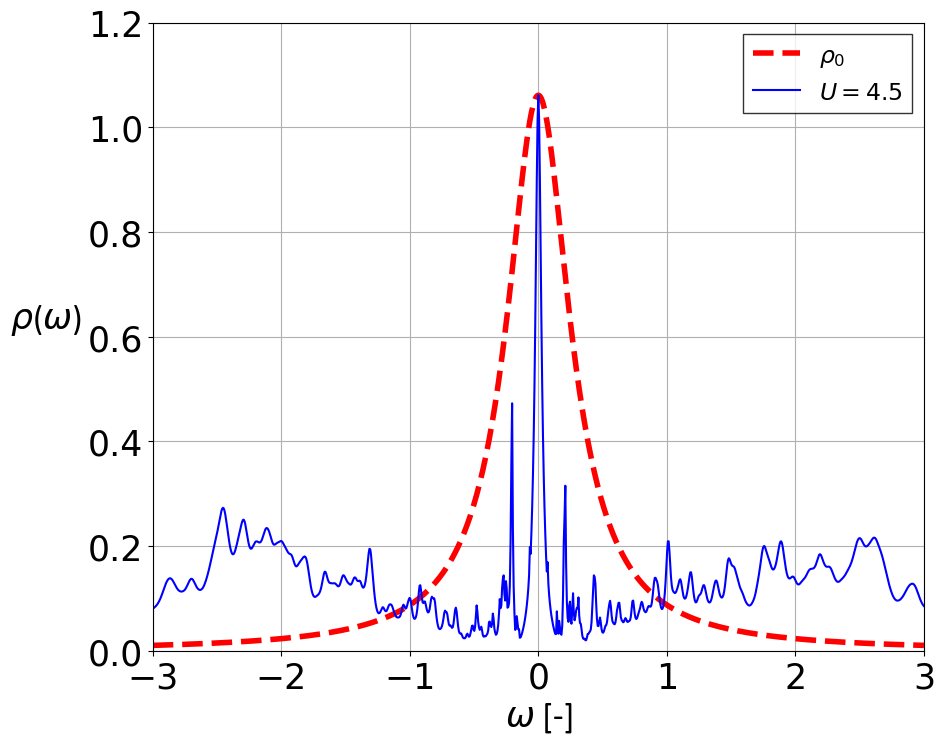

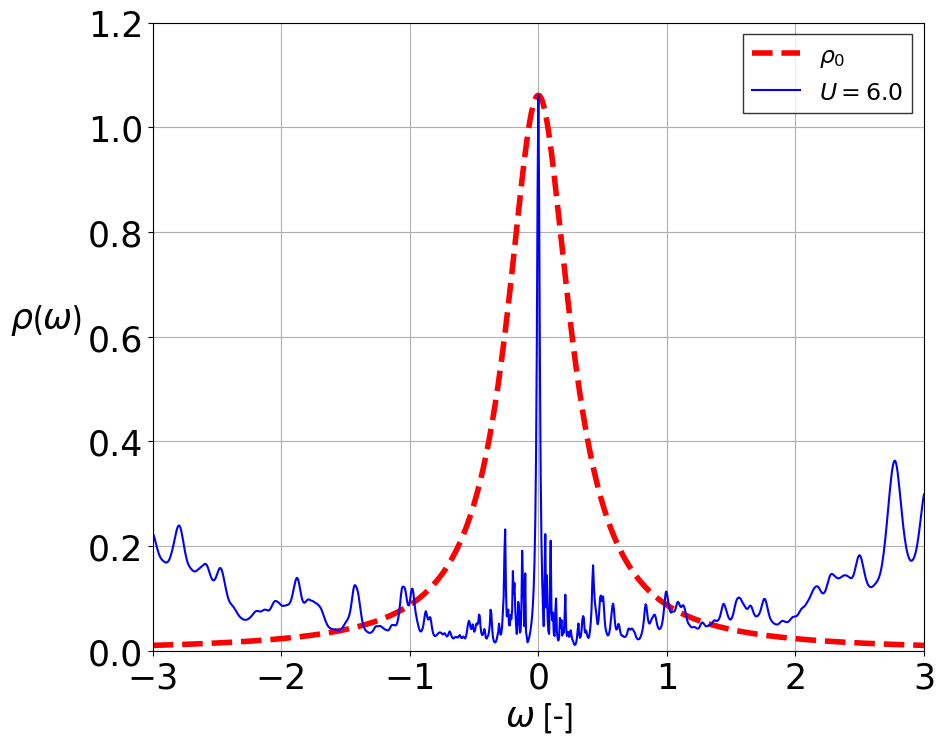

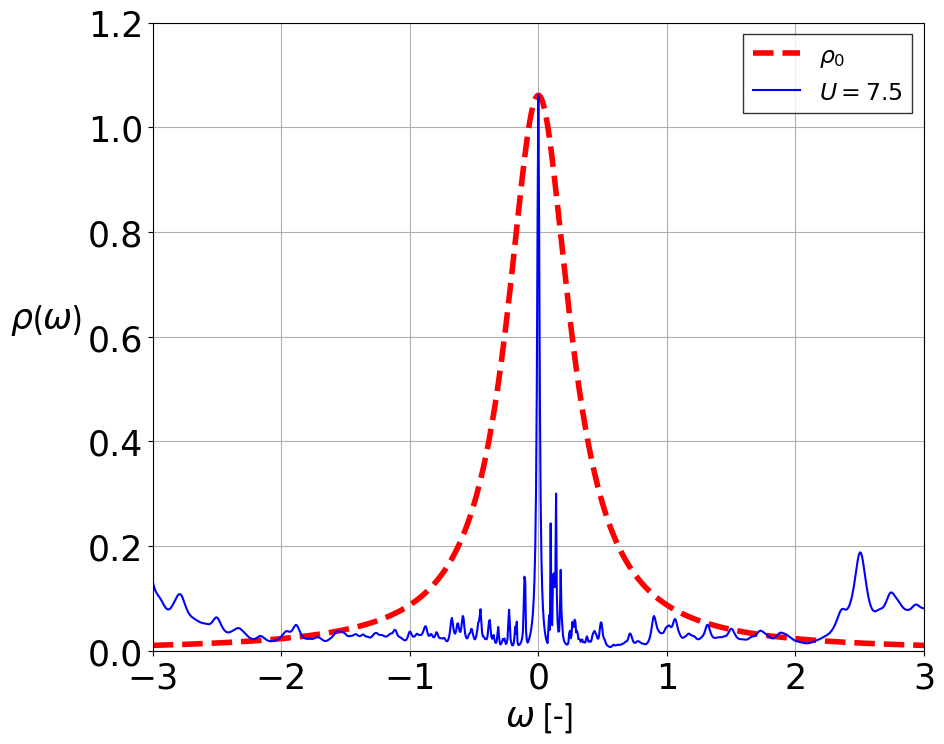

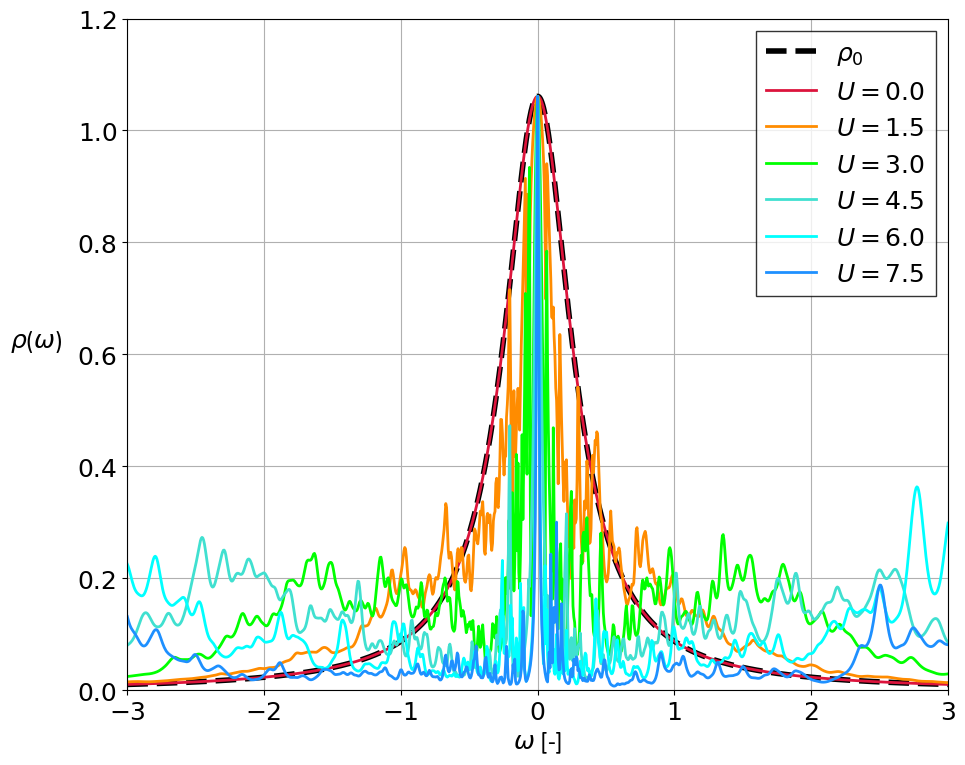

In [3]:
input=[{"N" : 100, "poles" : 4, "U" : 0, "Sigma" : 0, "ctype" : 'n'},
{"N" : 100, "poles" : 4, "U" : 1.5, "Sigma" : 0.75, "ctype" : 'n'},
{"N" : 100, "poles" : 4, "U" : 3.0, "Sigma" : 1.5, "ctype" : 'n'},
{"N" : 100, "poles" : 4, "U" : 4.5, "Sigma" : 2.25, "ctype" : 'n'},
{"N" : 100, "poles" : 4, "U" : 6.0, "Sigma" : 3.0, "ctype" : 'n'},
{"N" : 100, "poles" : 4, "U" : 7.5, "Sigma" : 3.75, "ctype" : 'n'}]
filenames,labelnames=['cN4p0U','cN4p1_5U','cN4p3U','cN4p4_5U','cN4p6U','cN4p7_5U'],['$\it{U=0.0}$','$\it{U=1.5}$','$\it{U=3.0}$','$\it{U=4.5}$','$\it{U=6.0}$','$\it{U=7.5}$']
DOST=np.zeros((len(filenames),1001),dtype = 'float')
for i,file in enumerate(filenames):
    DOST[i], Lor, omega, selectpT, selectpcT=DEDlib.main(**input[i])
    DEDlib.DOSplot(DOST[i], Lor, omega,file,labelnames[i])
    DEDlib.textfileW(omega,np.ravel(selectpT),np.ravel(selectpcT),DOST[i],file)
DEDlib.DOSmultiplot(omega,np.tile(omega, (len(filenames),1)),DOST,np.tile(len(omega), len(filenames)),labelnames,'Utotal')

  0%|          | 0/200 [00:00<?, ?it/s]

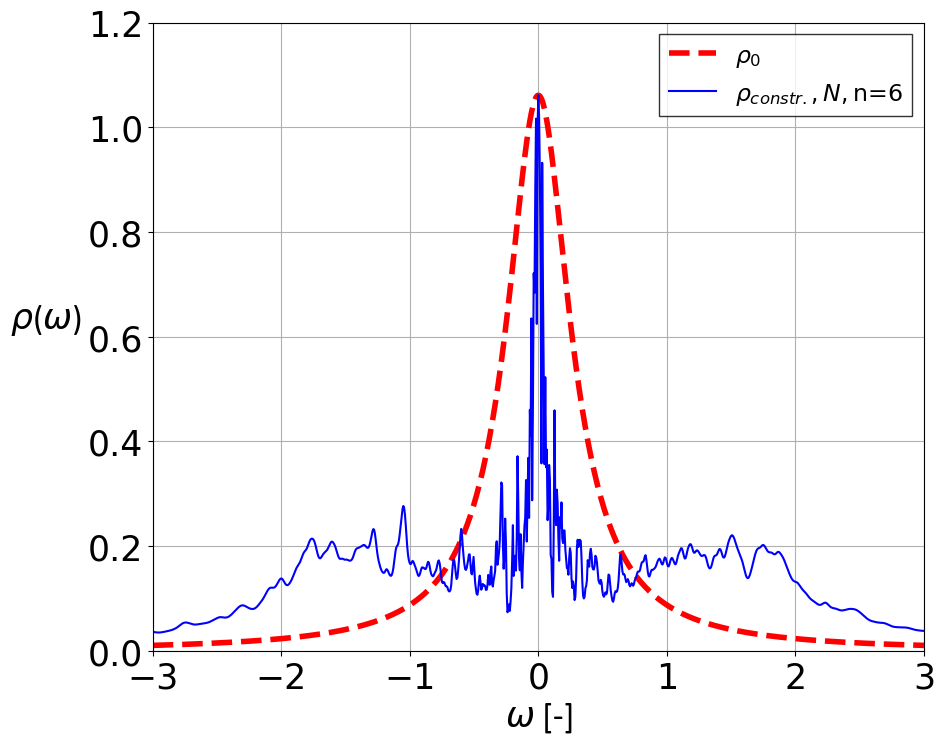

In [3]:
input=[{"N" : 1000, "poles" : 2, "ctype" : 'n'},
    {"N" : 200, "poles" : 6, "ctype" : 'n'},
    {"N" : 200, "poles" : 4,  "ctype" : ' '},
    {"N" : 100, "poles" : 4, "ctype" : 'n%2'}]
filenames,labelnames=['constraintN2p','constraintN6p','noconstraintN','constraint%2N'],['$\\rho_{constr.}, N,$n=2','$\\rho_{constr.}, N,$n=6','$\\rho_{no constr.},$n=4','$\\rho_{constr.},$ $N\\%$2,n=4']
i=1
file=filenames[i]
fDOS, Lor, omega, selectpT, selectpcT=DEDlib.main(**input[i])
DEDlib.DOSplot(fDOS, Lor, omega,file,labelnames[i])
DEDlib.textfileW(omega,np.ravel(selectpT),np.ravel(selectpcT),fDOS,file)

<module 'matplotlib.pyplot' from 'c:\\Users\\roelv\\OneDrive\\Documenten\\VSC\\.conda\\lib\\site-packages\\matplotlib\\pyplot.py'>

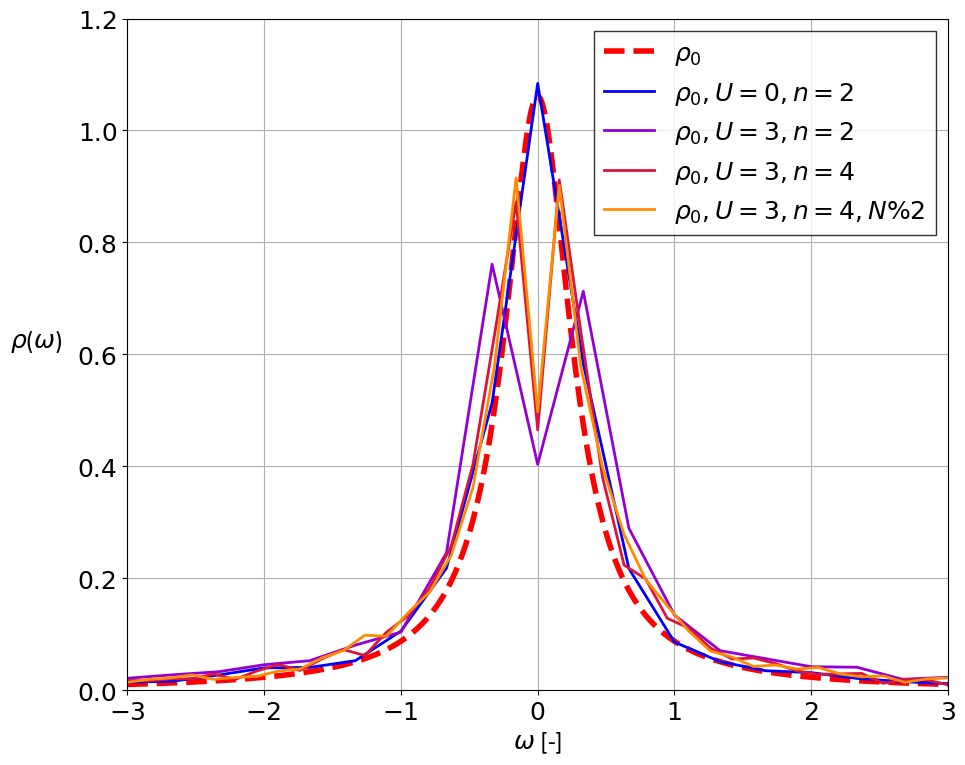

In [627]:
def DOSmultiplot(omega,omegap,DOST,plotp,labels,name):
    font = {'size'   : 18}
    colors=['blue','darkviolet','crimson','darkorange','lime']
    plt.rc('legend', fontsize=18)
    plt.rc('font', **font)
    plt.rc('xtick', labelsize=18)
    plt.rc('ytick', labelsize=18)
    axis_font = {'fontname':'Calibri', 'size':'18'}
    plt.figure(figsize=(10,8))
    plt.xlim(min(omega), max(omega))
    plt.gca().set_ylim(bottom=0,top=1.2)
    plt.xlabel("$\\omega$ [-]", **axis_font)
    plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=30,**axis_font)
    plt.plot(omega,Lorentzian(omega,0.3,4)[0], '--r',linewidth=4,label='$\\rho_0$')
    for i,p in enumerate(plotp):
        plt.plot(omegap[i,:p],DOST[i,:p],colors[i],linewidth=2,label=labels[i])
    plt.legend(fancybox=False).get_frame().set_edgecolor('black')
    plt.grid()
    plt.tight_layout()
    plt.savefig(name+'.png')
    plt.savefig(name+'.svg', format='svg', dpi=3600)
    plt.draw()
    return plt

DOSmultiplot(omega,omegap,DOST,[int(input[i]["N"]*input[i]["poles"]/200)-1 for i,_ in enumerate(filenames)],labelnames,'selection')

In [625]:
DOST[i,:int(input[i]["N"]*input[i]["poles"]/200)-1]

array([0.01419214, 0.01951419, 0.02217522, 0.02749727, 0.01951419,
       0.02306223, 0.02483624, 0.03459334, 0.03814138, 0.05765557,
       0.0709607 , 0.09845797, 0.09668395, 0.13837336, 0.17562773,
       0.24126638, 0.36189956, 0.5792167 , 0.91539301, 0.4976119 ,
       0.90208788, 0.57744269, 0.39915393, 0.27852074, 0.19780295,
       0.15079148, 0.10555404, 0.07007369, 0.05942959, 0.04257642,
       0.04523745, 0.03814138, 0.0408024 , 0.02927129, 0.02394924,
       0.02572325, 0.01419214, 0.0204012 , 0.02217522])

  0%|          | 0/2000 [00:00<?, ?it/s]

20- 0.00969839096069336 s attempt 0 1999-----
[[0.01449861 0.01620433 0.0272915  0.04008439 0.04093725 0.05287728
  0.10575456 0.21833199 0.51342131 1.0839842  0.58335578 0.21747913
  0.08613879 0.05117156 0.03496723 0.03155579 0.02132148 0.01535147
  0.01194003 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.   

  0%|          | 0/2000 [00:00<?, ?it/s]

20- 0.029091358184814453 s attempt 3 1999----
[[0.01449861 0.01620433 0.0272915  0.04008439 0.04093725 0.05287728
  0.10575456 0.21833199 0.51342131 1.0839842  0.58335578 0.21747913
  0.08613879 0.05117156 0.03496723 0.03155579 0.02132148 0.01535147
  0.01194003 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.02151755 0.02779351 0.0331729  0.0457248  0.05289732 0.08069083
  0.10400151 0.24565874 0.76118347 0.40345413 0.71276897 0.28959041
  0.13448471 0.07082861 0.05648358 0.04213854 0.04124198 0.01972442
  0.02331068 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.      

  0%|          | 0/2000 [00:00<?, ?it/s]

40- 0.20407366752624512 s attempt 4 1999----
[[0.01449861 0.01620433 0.0272915  0.04008439 0.04093725 0.05287728
  0.10575456 0.21833199 0.51342131 1.0839842  0.58335578 0.21747913
  0.08613879 0.05117156 0.03496723 0.03155579 0.02132148 0.01535147
  0.01194003 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.02151755 0.02779351 0.0331729  0.0457248  0.05289732 0.08069083
  0.10400151 0.24565874 0.76118347 0.40345413 0.71276897 0.28959041
  0.13448471 0.07082861 0.05648358 0.04213854 0.04124198 0.01972442
  0.02331068 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.01775471 0.01686698 0.02041792 0.02041792 0.02929527 0.01953018
  0.03462169 0.04616225 0.03550942 0.05592734 0

  0%|          | 0/2000 [00:00<?, ?it/s]

40- 0.14641046524047852 s attempt 1 1999----
[[0.01449861 0.01620433 0.0272915  0.04008439 0.04093725 0.05287728
  0.10575456 0.21833199 0.51342131 1.0839842  0.58335578 0.21747913
  0.08613879 0.05117156 0.03496723 0.03155579 0.02132148 0.01535147
  0.01194003 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.02151755 0.02779351 0.0331729  0.0457248  0.05289732 0.08069083
  0.10400151 0.24565874 0.76118347 0.40345413 0.71276897 0.28959041
  0.13448471 0.07082861 0.05648358 0.04213854 0.04124198 0.01972442
  0.02331068 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.01775471 0.01686698 0.02041792 0.02041792 0.02929527 0.01953018
  0.03462169 0.04616225 0.03550942 0.05592734 0

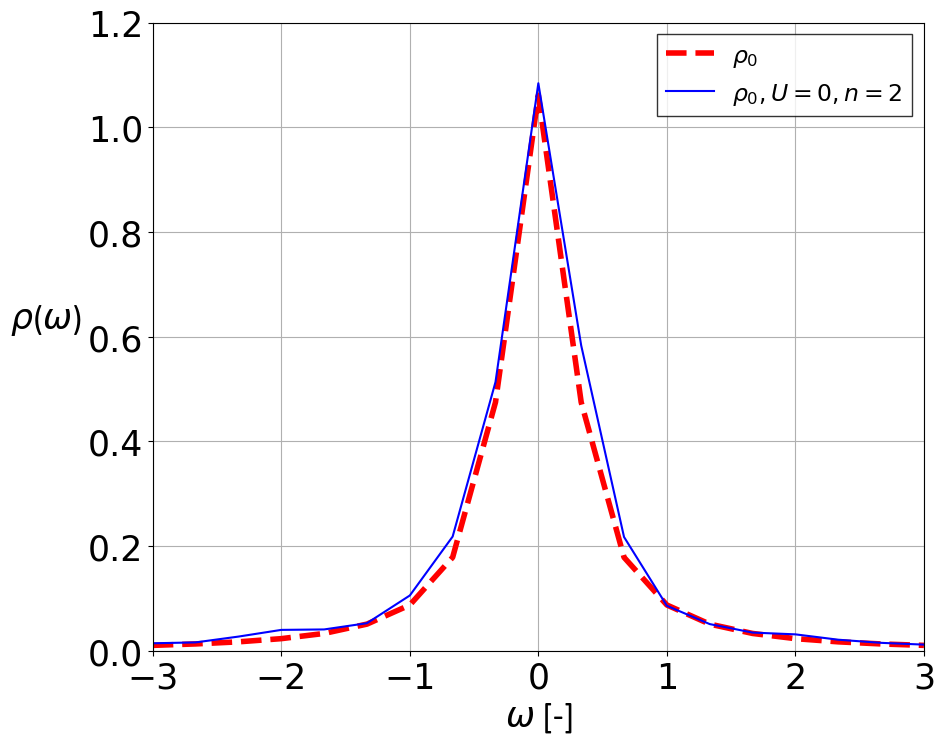

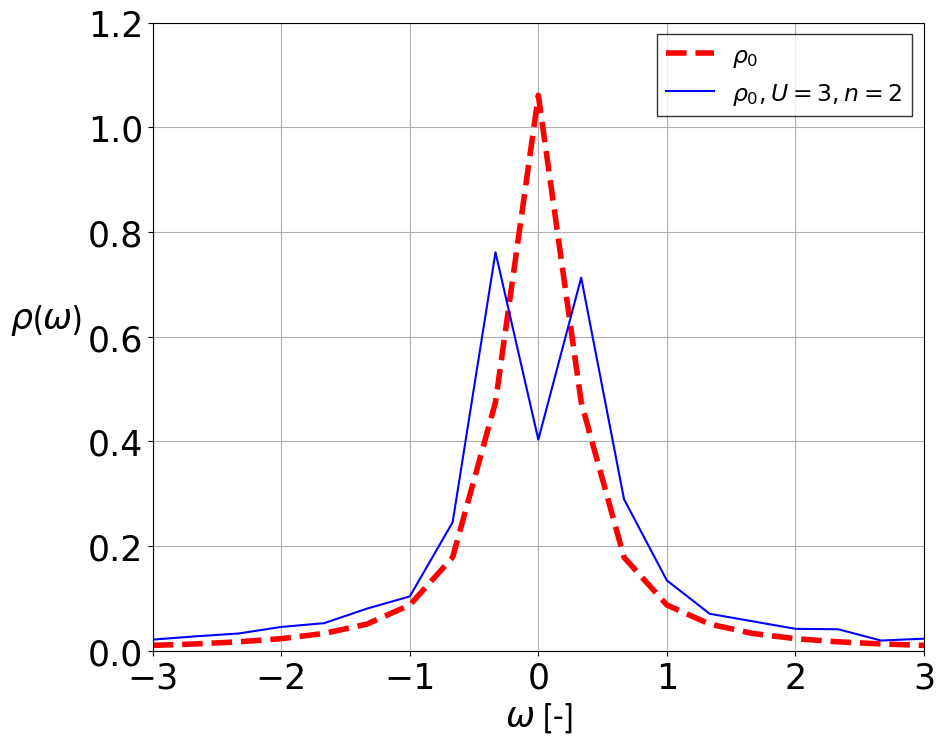

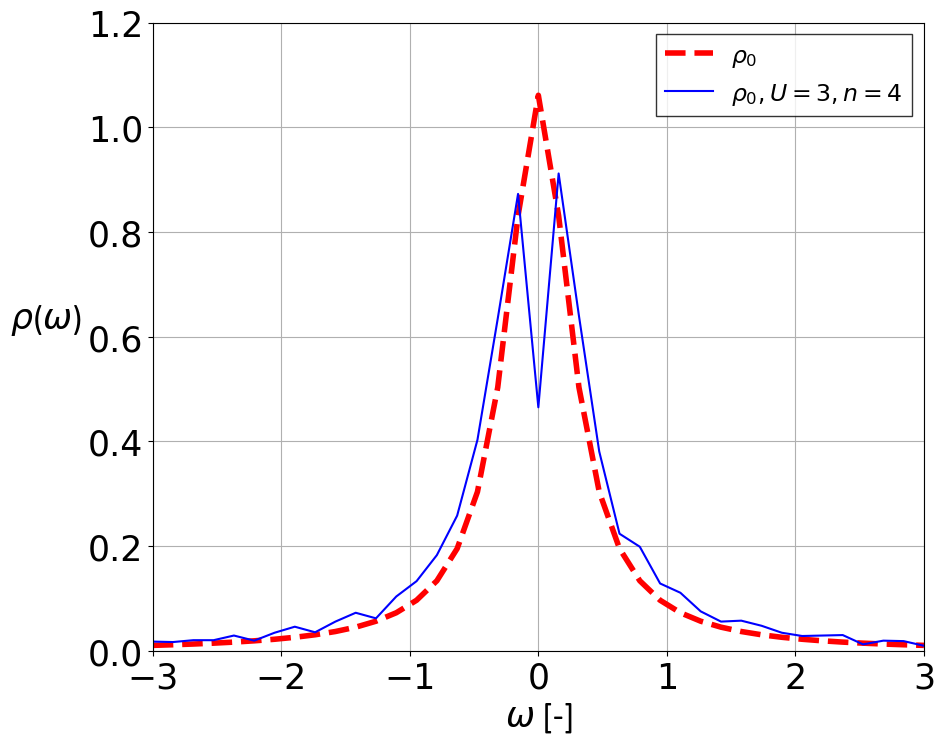

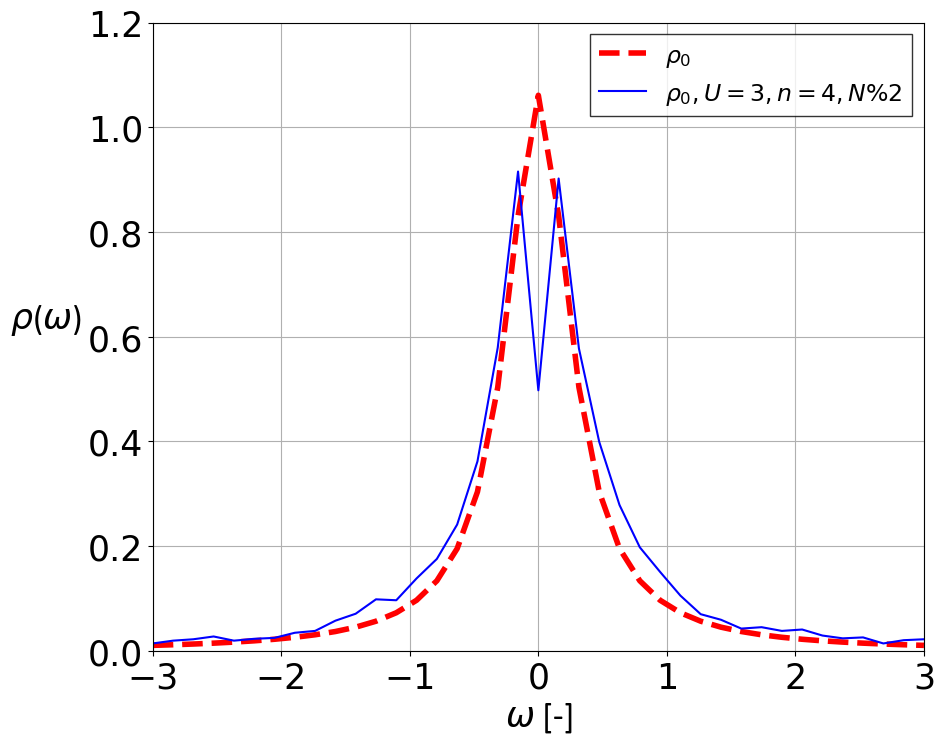

In [624]:
input=[{"N" : 2000, "poles" : 2, "U" : 0, "Sigma" : 0, "ctype" : 'n'},
{"N" : 2000, "poles" : 2, "U" : 3, "Sigma" : 1.5, "ctype" : 'n'},
{"N" : 2000, "poles" : 4, "U" : 3, "Sigma" : 1.5, "ctype" : 'n'},
{"N" : 2000, "poles" : 4, "U" : 3, "Sigma" : 1.5, "ctype" : 'n%2'}]
filenames,labelnames=['Lorentz2p0U','Lorentz2p3U','Lorentz4p3U','Lorentz4p3U%2N'],['$\\rho_0,\it{U=0,n=2}$','$\\rho_0,\it{U=3,n=2}$','$\\rho_0,\it{U=3,n=4}$','$\\rho_0,\it{U=3,n=4},N\\%$2']
DOST=np.zeros((len(filenames),int(input[3]["N"]*input[3]["poles"]/200)-1),dtype = 'float')
omegap=np.zeros((len(filenames),int(input[3]["N"]*input[3]["poles"]/200)-1),dtype = 'float')
for i,file in enumerate(filenames):
    fDOS, Lor, omega, selectpT, selectpcT=DEDlib.main(**input[i])
    omegap[i,:int(input[i]["N"]*input[i]["poles"]/200)-1],DOST[i,:int(input[i]["N"]*input[i]["poles"]/200)-1],DOSsm,DOSnon=PolestoDOS(np.ravel(selectpcT),np.ravel(selectpT))
    DEDlib.DOSplot(DOST[i,:int(input[i]["N"]*input[i]["poles"]/200)-1], DEDlib.Lorentzian(omegap[i,:int(input[i]["N"]*input[i]["poles"]/200)-1],0.3,4)[0], omegap[i,:int(input[i]["N"]*input[i]["poles"]/200)-1],file,labelnames[i])
    DEDlib.textfileW(omegap[i,:int(input[i]["N"]*input[i]["poles"]/200)-1],np.ravel(selectpT),np.ravel(selectpcT),DOST[i,:int(input[i]["N"]*input[i]["poles"]/200)-1],file)
    print(DOST)


In [594]:
fDOS, Lor, omega, selectpT, selectpcT=DEDlib.main(N=200000,poles=2,U=3,Sigma=1.5,ctype='n')

  0%|          | 0/200000 [00:00<?, ?it/s]

In [604]:
def PolestoDOS(select,selectnon):
    bar=int(len(select)/200)
    print(bar)
    bomega=np.linspace(-3,3,bar)
    DOSp=[((bomega[i] < select) & (select <= bomega[i+1])).sum() for i in range(0,bar-1)]
    return np.linspace(-3,3,bar-1),DOSp/(6/(bar-1)*sum(DOSp)),[np.mean(DOSp[j-1:j+1]) 
                                                         for j in range(1,bar-2)],[((bomega[i] < selectnon) & (selectnon <= bomega[i+1])).sum() 
                                                                                   for i in range(0,bar-1)]


In [607]:
200000*2/200

2000.0

In [605]:
omega,y,ysm,y2=PolestoDOS(np.ravel(selectpcT),np.ravel(selectpT))

2000


In [603]:
len(y)

1999

<module 'matplotlib.pyplot' from 'c:\\Users\\roelv\\OneDrive\\Documenten\\VSC\\.conda\\lib\\site-packages\\matplotlib\\pyplot.py'>

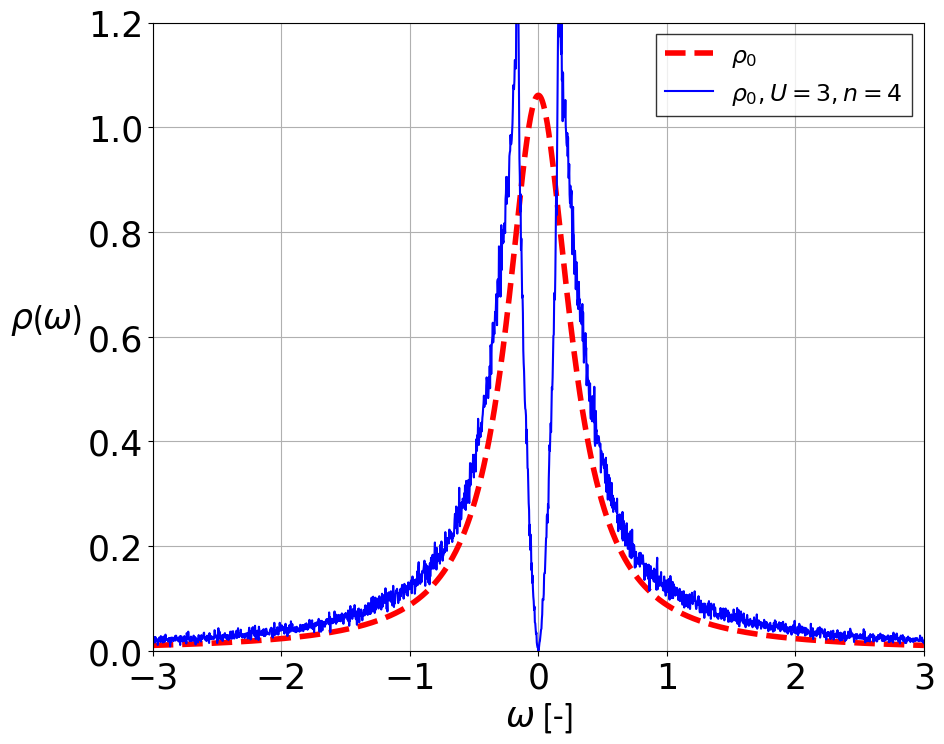

In [602]:
DEDlib.DOSplot(y,DEDlib.Lorentzian(omega,0.3,4)[0],omega,'Lorentz4p3U','$\\rho_0,\it{U=3,n=4}$')

In [544]:

select=np.ravel(selectpcT)
selectnon=np.ravel(selectpT)
bar=int(len(select)/200)
x=np.linspace(-3,3,bar)
y=[((x[i] < select) & (select <= x[i+1])).sum() for i in range(0,bar-1)]
y2=[((x[i] < selectnon) & (selectnon <= x[i+1])).sum() for i in range(0,bar-1)]
y=y/(6/(bar-1)*sum(y))
ysm=[np.mean(y[j-1:j+1]) for j in range(1,bar-2)]
print(len(ysm))


397


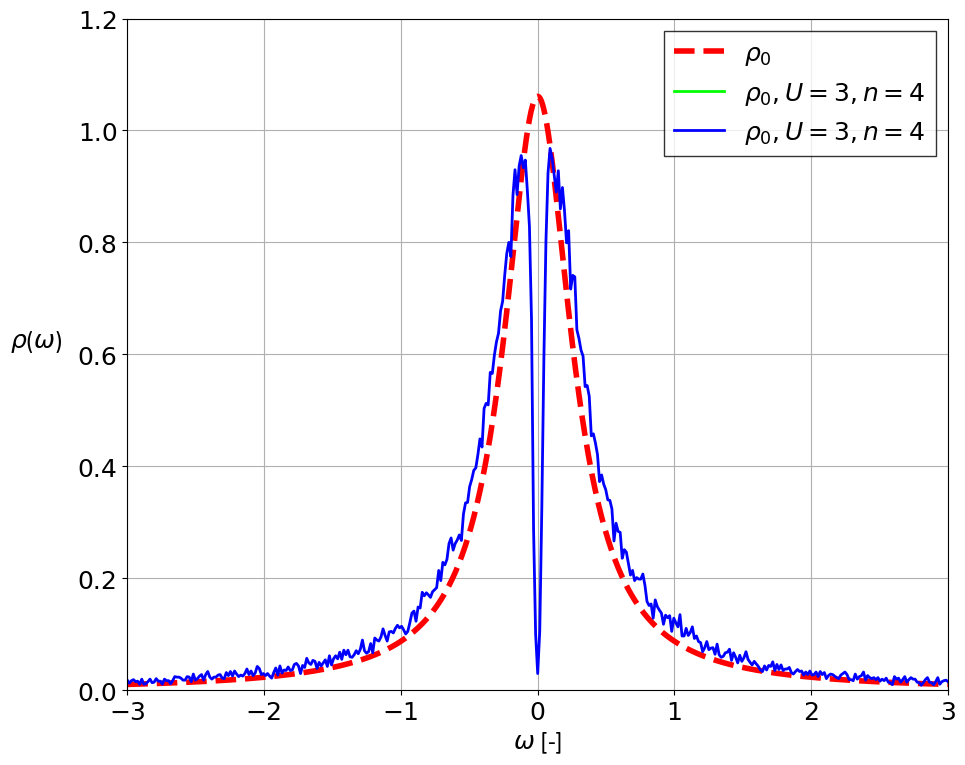

In [570]:
font = {'size'   : 18}
plt.rc('legend', fontsize=18)
plt.rc('font', **font)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
axis_font = {'fontname':'Calibri', 'size':'18'}
plt.figure(figsize=(10,8))
plt.xlim(min(omega), max(omega))
plt.gca().set_ylim(bottom=0,top=1.2)
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=30,**axis_font)
plt.plot(np.linspace(-3,3,1001),DEDlib.Lorentzian(np.linspace(-3,3,1001),0.3,4)[0], '--r',linewidth=4,label='$\\rho_0$')
plt.plot(np.linspace(-3,3,bar-3),ysm,color='lime',linewidth=2,label='$\\rho_0,\it{U=3,n=4}$')
plt.plot(omega,y,'-b',linewidth=2,label='$\\rho_0,\it{U=3,n=4}$')
plt.legend(fancybox=False).get_frame().set_edgecolor('black')
plt.grid()
plt.tight_layout()

In [520]:
select

array([-0.39882143, -0.12903267,  0.25026044, ..., -0.18486647,
        0.44909736,  1.07702506])

In [45]:
def find_identical_indices(arr):
    """
    Given an array `arr`, return a dictionary where the keys are the
    elements in `arr` that occur more than once, and the values are lists
    of indices where that element occurs.
    """
    index_dict = {}
    for i, val in enumerate(arr):
        if val in index_dict:
            index_dict[val].append(i)
        else:
            index_dict[val] = [i]
    return {k: v for k, v in index_dict.items() if len(v) > 1}

def switch_indices(idxn, idx):
    """
    Given an array `arr` and two indices `index1` and `index2`,
    switch the elements at those indices in the array.
    """
    for i in idxn:
        idx[idxn[i][0]], idx[idxn[i][1]] = idx[idxn[i][1]], idx[idxn[i][0]]
    return idx

# Defining the Jordan Wigner transformation for a 1D lattice
def jordan_wigner_transform(j, lattice_length):
    for k in range(j):
        if k == 0:
            operators = sigmaz()
        else:
            operators = tensor(operators, sigmaz())
    if j == 0:
        operators = sigmap()
    else:
        operators = tensor(operators, sigmap())
    for k in range(lattice_length - j - 1):
        operators = tensor(operators, identity(2))
    return operators

# Define rho0 distribution
def Lorentzian(omega, Gamma, poles):
    Rho0 = Gamma / np.pi / (omega ** 2 + Gamma ** 2)
    p = np.random.uniform(0, 1, poles)
    Rhoint = np.zeros(poles)
    for i in range(len(p)):
        Rhoint[i] = Gamma * math.tan(np.pi * (p[i] - 1 / 2))  ###p[i]-1/2
    return Rho0, Rhoint

# Calculates parameters impengergy,bathenergy and Vkk from random sampling distribution utilizing the Green's function
def nonintG(omega, eta, select):
    G = 0
    for i in range(len(select)):
        G = G + 1 / len(select) / (omega - select[i] + 1.j * eta)
    return G

# Based on energy parameters calculates the Hamiltonian of the impurity system
def HamiltonianAIM(c, n, impenergy, bathenergy, Vkk, U, Sigma):
    H = 0
    for i in range(2):
        H += impenergy * (c[i].dag() * c[i])
        for j in range(len(bathenergy)):
            H += Vkk[j] * (c[i].dag() * c[2 * j + i + 2] + c[2 * j + i + 2].dag() * c[i])
            H += bathenergy[j] * (c[2 * j + i + 2].dag() * c[2 * j + i + 2])
    try:
        _, vecs =scipy.sparse.linalg.eigs(np.real(H.data), k=1, which='SR')
        exp0state=np.real(np.dot(np.conj(vecs[:,0]).T,n.data*vecs[:,0]))
    except np.linalg.LinAlgError:
        return H,0,True
    except ValueError:
        return H,0,True
    H += U * (c[0].dag() * c[0] * c[1].dag() * c[1])
    H += -Sigma * (c[0].dag() * c[0] + c[1].dag() * c[1])
    return H,exp0state,False

def eigenstates(H):
    evals, evecs = scipy.linalg.eigh(H.data.toarray())
    _zipped = list(zip(evals, range(len(evals))))
    _zipped.sort()
    evals, perm = list(zip(*_zipped))
    #evecs = np.array([evecs[:, k] for k in perm])
    #ekets = np.empty((len(evecs),), dtype=object)
    #ekets[:] = [Qobj(vec, dims=[H.dims[0], [1] * len(H.dims[0])], type='ket') for vec in evecs]
    #norms =np .array([ket.norm() for ket in ekets])
    for i,_ in enumerate(evals):
        evecs[:,i]=evecs[:,i]/np.linalg.norm(evecs[:,i])

    return evals, evecs

def MBGAIM(omega, H, c, eta, start_time ,attempts, j):
    MBG = np.zeros(len(omega),dtype = 'complex_')
    eigs=eigenstates(H)
    print("--- %s s attempt %d" % ((time.time() - start_time) ,attempts)+" "+str(j)+"---",end='\r')
    for i in range(1, len(eigs[0])):
        #exp = np.dot(eigs[1][i].dag().full(), c[0].full()@eigs[1][0].full())
        #exp2 = np.dot(eigs[1][i].dag().full(), c[0].dag().full()@eigs[1][0].full())
        exp = np.dot(eigs[1][i].dag(), np.dot(c[0], eigs[1][0]))
        exp2 = np.dot(eigs[1][i].dag(), np.dot(c[0].dag(), eigs[1][0]))
        k = abs(exp[0][0]) ** 2
        l = abs(exp2[0][0]) ** 2
        final = k / (omega + eigs[0][i] - eigs[0][0] + 1.j * eta) + l / (omega + eigs[0][0] - eigs[0][i] + 1.j * eta)
        MBG += final
        print("--- %s s iteration %d" % ((time.time() - start_time) ,i)+" "+str(j)+"---",end='\r')
    return MBG

# Gives Green’s function for the impurity level in the full interacting system (up and down spin)
def AIMsolver(impenergy, bathenergy, Vkk, U, Sigma, omega, eta, c, n, start_time, attempts, i):
    H,exp2,error = HamiltonianAIM(c, n, impenergy, bathenergy, Vkk, U, Sigma)
    if not error:
        _, vecs =scipy.sparse.linalg.eigs(np.real(H.data), k=1, which='SR')
        exp=np.dot(np.conj(vecs[:,0]).T,n.data*vecs[:,0])
        if np.round(exp)==np.round(exp2):
            MBG = MBGAIM(omega, H, c, eta,start_time, attempts, i)
            return MBG,True
        else:
            return np.zeros(len(omega),dtype = 'complex_'),False
    else:
        return np.zeros(len(omega),dtype = 'complex_'),False

def DPgen(poles,select,pos):
    Pbath =np.array(Pcal(poles,pos))
    s = (poles,poles)
    Dbath=np.zeros(s)
    for i in range(len(select)):
        Dbath[i][i]=select[i]
    M=np.dot(Pbath,np.dot(Dbath,Pbath.T))
    return M

def startrans(poles,select,row,col):
    ham_mat=DPgen(poles,select,row)
    Hkk=np.delete(np.delete(ham_mat,row,axis=0),row,axis=1)
    eigkk,veckk=scipy.linalg.eig(Hkk)#might cause problem
    pbar=np.insert(np.insert(veckk, row,0,axis=0),row,0,axis=1)
    pbar[row][row]=1
    Hp=np.dot(pbar.T,np.dot(ham_mat,pbar))
    return Hp

In [504]:
N=1
poles=4
U=3
Sigma=3/2
Gamma=0.3
SizeO=1001

omega= np.linspace(-3,3,SizeO)
AvgSigmadat=np.zeros(len(omega),dtype = 'complex_')
lattice_length = 2+2*(poles-1)
c = []
for i in range(lattice_length):
    c.append(jordan_wigner_transform(i, lattice_length))
n=0
for i in range(lattice_length):
    n+=c[i].dag()*c[i]

for i in tqdm(range(N)):
    start_time = time.time()
    attempts=0
    reset=False
    while not reset:
        select=sorted(Lorentzian(omega, Gamma, poles)[1])
        NewM=startrans(poles,select,0,0)
        bathenergy=[]
        impenergy=NewM[0][0]
        for k in range(len(NewM)-1):
            bathenergy.append(NewM[k+1][k+1])
        Vkk=NewM[0,1:]
        eta=0.02*abs(omega)+0.000000000000000000000001

        H,exp2,error = HamiltonianAIM(c, n, impenergy, bathenergy, Vkk, U, Sigma)
        if not error:
            _, vecs =scipy.sparse.linalg.eigs(np.real(H.data), k=1, which='SR')
            exp=np.dot(np.conj(vecs[:,0]).T,n.data*vecs[:,0])
            if np.round(exp)==np.round(exp2):
                MBG = np.zeros(len(omega),dtype = 'complex_')
                #MBG2 = np.zeros(len(omega),dtype = 'complex_')
                #eigs=eigenstates(H)
                evals, evecs = scipy.linalg.eigh(H.data.toarray())

                ############################################### test

                eigm2=scipy.sparse.csr_matrix(evecs)
                exptest=np.conj(eigm2[:,1:]).T@c[0].data@eigm2[:,0]
                exptest2=np.conj(eigm2[:,1:]).T@c[0].dag().data@eigm2[:,0]
                #print(exptest.toarray().T[0]** 2,exptest2.toarray().T[0]** 2,'new')

                #for i,_ in enumerate(exptest.toarray()):
                    #print(exptest.toarray()[i]** 2)
                    #final = abs(exptest.toarray()[i][0])** 2 / (omega + evals[i+1] - evals[0] + 1.j * eta) + abs(exptest2.toarray()[i][0])** 2 / (omega + evals[0] - evals[i+1] + 1.j * eta)
                    #MBG2 += final
                #print("--- %s s attempt %d" % (time.time()  ,attempts)+" "+str(j)+"---",end='\r')
                MBG3=sum([abs(exptest.toarray()[i][0])** 2 / (omega + evals[i+1] - evals[0] + 1.j * eta) + 
                      abs(exptest2.toarray()[i][0])** 2 / (omega + evals[0] - evals[i+1] + 1.j * eta) for i,_ in enumerate(exptest.toarray())])
                time1=time.time() - start_time

                _zipped = list(zip(evals, range(len(evals))))
                _zipped.sort()
                evals, perm = list(zip(*_zipped))

                #print("--- %s s attempt %d" % ((time.time() ) ,attempts)+" "+str(j)+"---",end='\r')
                #print(exptest.toarray()[i][0],exptest2.toarray()[i][0],evals[i+1],final)
                #print(i,exptest[i],exptest2[i],final)
                ###########################################
                evecs = np.array([evecs[:, k] for k in perm])
                ekets = np.empty((len(evecs),), dtype=object)
                ekets[:] = [Qobj(vec, dims=[H.dims[0], [1] * len(H.dims[0])], type='ket') for vec in evecs]
                norms =np .array([ket.norm() for ket in ekets])
                #print("--- %s s attempt %d" % ((time.time() - start_time) ,attempts)+" "+str(j)+"---",end='\r')
                reset=True
                eigs=evals,ekets/norms
                #print("--- %s s attempt %d" % ((time.time() - start_time) ,attempts)+" "+str(j)+"---",end='\r')

                for i in range(1, len(eigs[0])):
        #exp = np.dot(eigs[1][i].dag().full(), c[0].full()@eigs[1][0].full())
        #exp2 = np.dot(eigs[1][i].dag().full(), c[0].dag().full()@eigs[1][0].full())
                    exp = np.dot(eigs[1][i].dag(), np.dot(c[0], eigs[1][0]))
                    exp2 = np.dot(eigs[1][i].dag(), np.dot(c[0].dag(), eigs[1][0]))



                    k = abs(exp[0][0]) ** 2
                    l = abs(exp2[0][0]) ** 2
                    final = k / (omega + eigs[0][i] - eigs[0][0] + 1.j * eta) + l / (omega + eigs[0][0] - eigs[0][i] + 1.j * eta)
                    MBG += final
                    print("--- %s s iteration %d" % ((time.time() - start_time) ,i)+" "+str(j)+"---",end='\r')
                time2=time.time()- start_time
                print(time2-time1,MBG,MBG3)
                NewSigmadat=1/nonintG(omega,eta,select)-1/MBG+Sigma
                if np.isnan(NewSigmadat).any() or any(i >= 1000 for i in np.real(NewSigmadat)):
                    reset=False
        attempts+=1
    AvgSigmadat=AvgSigmadat+NewSigmadat/N


  0%|          | 0/1 [00:00<?, ?it/s]

0.33511900901794434 [0.65021775-1.44796958j 0.72048783-1.33011158j 0.76845918-1.21370854j ...
 0.34655319-0.00918084j 0.34563473-0.00914747j 0.34472143-0.00911441j] [0.65021775-1.44796958j 0.72048783-1.33011158j 0.76845918-1.21370854j ...
 0.34655319-0.00918084j 0.34563473-0.00914747j 0.34472143-0.00911441j]


In [497]:
time1,time2

(17.772042274475098, 1009.7169106006622)

In [471]:
np.dot(eigs[1][i].dag(), np.dot(c[0].dag(), eigs[1][0])),i

(array([[0.+0.j]]), 14)

In [475]:
exptest2.toarray()

array([[ 9.78101701e-01+0.j],
       [ 0.00000000e+00+0.j],
       [-2.08127514e-01+0.j],
       [ 0.00000000e+00+0.j],
       [-2.66888625e-16+0.j],
       [ 6.24500451e-17+0.j],
       [-1.73472348e-17+0.j],
       [-1.08420217e-18+0.j],
       [ 2.01191944e-18+0.j],
       [ 1.36035618e-17+0.j],
       [-2.23491158e-16+0.j],
       [ 1.38666956e-32+0.j],
       [ 3.08607501e-17+0.j],
       [ 3.46667390e-33+0.j],
       [ 0.00000000e+00+0.j]])

In [470]:
print(np.conj(eigm2[:,1:]).T@c[0].dag().data@eigm2[:,0])

  (0, 0)	(0.9781017012823798+0j)
  (2, 0)	(-0.2081275136749441+0j)
  (4, 0)	(-2.6688862531617756e-16+0j)
  (5, 0)	(6.245004513516506e-17+0j)
  (6, 0)	(-1.734723475976807e-17+0j)
  (7, 0)	(-1.0842021724855044e-18+0j)
  (8, 0)	(2.0119194354266533e-18+0j)
  (9, 0)	(1.3603561824929557e-17+0j)
  (10, 0)	(-2.2349115779950667e-16+0j)
  (11, 0)	(1.3866695599588098e-32+0j)
  (12, 0)	(3.0860750130067027e-17+0j)
  (13, 0)	(3.4666738998970245e-33+0j)


In [462]:
k,l

(0.0, 0.0)

In [463]:
i=14
abs(exptest.toarray()[i][0])** 2 / (omega + evals[i+1] - evals[0] + 1.j * eta) + abs(exptest2.toarray()[0][0])** 2 / (omega + evals[0] - evals[i+1] + 1.j * eta)

array([-0.07601753-0.00036243j, -0.07605379-0.00036205j,
       -0.07609009-0.00036167j, ..., -0.14501158-0.00131366j,
       -0.14514352-0.0013187j , -0.14527571-0.00132375j])

In [464]:
abs(exptest.toarray()[i][0])** 2 

0.0

In [465]:
exptest2.toarray()[0][0]

(0.9781017012823798+0j)

In [466]:
abs(exptest2.toarray()[0][0])** 2

0.9566829380514857

In [333]:
MBG = np.zeros(len(omega),dtype = 'complex_')
evals, evecs = scipy.linalg.eigh(H.data.toarray())
_zipped = list(zip(evals, range(len(evals))))
_zipped.sort()
evals, perm = list(zip(*_zipped))
#evecs = np.array([evecs[:, k] for k in perm])
#norms=np.zeros(len(evals))
#for i,_ in enumerate(evals):
#    norms[i]=np.linalg.norm(evecs[:,i])
eigm2=scipy.sparse.csr_matrix(evecs)
exp=np.conj(eigm2[:,1:]).T@c[0].data@eigm2[:,0]
exp2=np.conj(eigm2[:,1:]).T@c[0].dag().data@eigm2[:,0]
print(exp,exp.toarray().T[0])
for i,_ in enumerate(exp.toarray()[0]):
    #print(exp[i]**2,exp2[i]**2)
    final = exp[i]**2 / (omega + evals[i+1] - evals[0] + 1.j * eta) + exp2[0]**2 / (omega + evals[0] - evals[i+1] + 1.j * eta)
    MBG += final
#print(fin[0,:].toarray()[0])

  (0, 0)	(0.7060898267300386+0j)
  (9, 0)	(0.03790984817093035+0j) [0.70608983+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.03790985+0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j]


ValueError: non-broadcastable output operand with shape (1001,) doesn't match the broadcast shape (1,1001)

In [319]:

np.conj(eigm2[:,1:]).T@c[0].dag().data@evecs[:,0]

array([-6.97499239e-02+0.j,  0.00000000e+00+0.j,  3.89608373e-15+0.j,
        0.00000000e+00+0.j,  3.51754515e-15+0.j,  0.00000000e+00+0.j,
        0.00000000e+00+0.j,  0.00000000e+00+0.j, -7.03658261e-01+0.j,
        0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j])

In [322]:
for i in range(1, len(eigs[0])):
    print(np.dot(eigs[1][i].dag(),np.dot(c[0].dag(), eigs[1][0])))

[[0.+0.j]]
[[0.+0.j]]
[[0.36463795+0.j]]
[[-1.20865098e-05+0.j]]
[[0.+0.j]]
[[0.+0.j]]
[[0.+0.j]]
[[0.+0.j]]
[[0.+0.j]]
[[0.+0.j]]
[[0.+0.j]]
[[0.+0.j]]
[[-0.03126972+0.j]]
[[-0.60503005+0.j]]
[[0.+0.j]]


In [257]:
eigm=np.zeros(len(eigs[1]))
for i in range(len(eigs[1])):
    eigm=np.c_[eigm,eigs[1][i].full()]
eigm=scipy.sparse.csr_matrix(eigm[:,1:])#[:,1:]

fin=eigs[1][0].dag().data@c[0].data@eigm[:,1:]
fin2=eigs[1][0].dag().data@c[0].dag().data@eigm[:,1:]
#print(fin[0,:].toarray()[0])
print(fin.toarray()[0],fin2.toarray()[0])

[0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.19152925+0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.6806736 +0.j 0.        +0.j 0.        +0.j] [0.19152925+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.6806736 +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j]


In [207]:
print(np.linalg.norm(evecs[:,i]),norms[0])

1.0 1.0


In [205]:
for i,_ in enumerate(evals):
    evecs[:,i]=evecs[:,i]/np.linalg.norm(evecs[:,i])

evecs[0]

array([0.00000000e+00+0.j, 2.82855802e-52+0.j, 1.31484525e-17+0.j, ...,
       0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j])

In [235]:
eigm=np.zeros(len(eigs[1]))
for i in range(len(eigs[1])):
    eigm=np.c_[eigm,eigs[1][i].full()]
eigm=scipy.sparse.csr_matrix(eigm[:,1:])[:,1:]

In [236]:
#prod=
#print(prod.shape,eigs[1][0].dag().data.shape)
fin=eigs[1][0].dag().data@c[0].data@eigm
fin2=eigs[1][0].dag().data@c[0].dag().data@eigm
#print(fin[0,:].toarray()[0])
print(fin.toarray()[0],fin2.toarray()[0])

[0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.19152925+0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.6806736 +0.j 0.        +0.j 0.        +0.j] [0.19152925+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.6806736 +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j]


In [3]:
def jordan_wigner_transform(j, lattice_length):
    for k in range(j):
        if k == 0:
            operators = sigmaz()
        else:
            operators = tensor(operators, sigmaz())
    if j == 0:
        operators = sigmap()
    else:
        operators = tensor(operators, sigmap())
    for k in range(lattice_length - j - 1):
        operators = tensor(operators, identity(2))
    return operators

# Define rho0 distribution
def Lorentzian(omega, Gamma, poles):
    Rho0 = Gamma / np.pi / (omega ** 2 + Gamma ** 2)
    p = np.random.uniform(0, 1, poles)
    Rhoint = np.zeros(poles)
    for i in range(len(p)):
        Rhoint[i] = Gamma * math.tan(np.pi * (p[i] - 1 / 2))  ###p[i]-1/2
    return Rho0, Rhoint

# Calculates parameters impengergy,bathenergy and Vkk from random sampling distribution utilizing the Green's function
def nonintG(omega, eta, select):
    G = 0
    for i in range(len(select)):
        G = G + 1 / len(select) / (omega - select[i] + 1.j * eta)
    return G

def MBGAIM(omega, eigs, c, eta):
    MBG = np.zeros(len(omega),dtype = 'complex_')
    for i in range(1, len(eigs[0])):
        exp = np.dot(eigs[1][i].dag(), np.dot(c[0], eigs[1][0]))
        exp2 = np.dot(eigs[1][i].dag(), np.dot(c[0].dag(), eigs[1][0]))
        k = abs(exp[0][0]) ** 2
        l = abs(exp2[0][0]) ** 2
        final = k / (omega + eigs[0][i] - eigs[0][0] + 1.j * eta) + l / (omega + eigs[0][0] - eigs[0][i] + 1.j * eta)
        MBG += final
    return MBG

# Gives Green’s function for the impurity level in the full interacting system (up and down spin)
def AIMsolver(impenergy, bathenergy, Vkk, U, Sigma, omega, eta, c, n, reset, start_time, attempts):
    MBG = np.zeros(len(omega),dtype = 'complex_')
    H,exp2,error = HamiltonianAIM(c, n, impenergy, bathenergy, Vkk, U, Sigma)
    print("--- %s s first part %d---" % ((time.time() - start_time) ,attempts), end='\r')
    if not error:
        eigs=H.eigenstates()
        exp = np.dot(eigs[1][0].dag(), np.dot(n, eigs[1][0]))
        if np.round(exp)==np.round(exp2):
            reset=True
            print("--- %s s second part %d---" % ((time.time() - start_time) ,attempts), end='\r')
            MBG = MBGAIM(omega, eigs, c, eta)
        return MBG,reset
    else:
        return MBG,reset

#Functions to transfor matrices
def Pcal(poles,pos):
    di=np.full((poles-1, poles), np.zeros(poles))
    for i in range(poles-1):
        for j in range(poles-1):
            if j>=i:
                di[i][j+1]=-1/sqrt((poles-i-1)*(poles-i))
        di[i][i]=sqrt(poles-i-1)/sqrt(poles-i)
    di=np.insert(di, pos,1/sqrt(poles),axis=0)
    return di

def DPgen(poles,select,pos):
    Pbath =np.array(Pcal(poles,pos))
    s = (poles,poles)
    Dbath=np.zeros(s)
    for i in range(len(select)):
        Dbath[i][i]=select[i]
    M=np.dot(Pbath,np.dot(Dbath,Pbath.T))
    return M

def startrans(poles,select,row,col):
    ham_mat=DPgen(poles,select,row)
    Hkk=np.delete(np.delete(ham_mat,row,axis=0),row,axis=1)
    eigkk,veckk=scipy.linalg.eig(Hkk)
    pbar=np.insert(np.insert(veckk, row,0,axis=0),row,0,axis=1)
    pbar[row][row]=1
    Hp=np.dot(pbar.T,np.dot(ham_mat,pbar))
    return Hp

In [15]:
N = 1000
poles = 2
U = 3
Sigma = 3/2
Gamma = 0.3
SizeO = 1001
omega= np.linspace(-3,3,SizeO)
AvgSigmadat=np.zeros(len(omega),dtype = 'complex_')
AvgSigma=np.zeros(len(omega),dtype = 'complex_')
AvgSigmadat2=np.zeros(len(omega),dtype = 'complex_')
lattice_length = 2+2*(poles-1)
c = []
for i in range(lattice_length):
    c.append(jordan_wigner_transform(i, lattice_length))
n=0
for i in range(lattice_length):
    n+=c[i].dag()*c[i]
t = time.time()
select=sorted(Lorentzian(omega, Gamma, poles)[1])
NewM=startrans(poles,select,0,0)
bathenergy=[]
impenergy=NewM[0][0]
for k in range(len(NewM)-1):
    bathenergy.append(NewM[k+1][k+1])
Vkk=NewM[0,1:]
eta=0.02*abs(omega)+0.000000000000000000000001



H = 0
for i in range(2):
        H += impenergy * (c[i].dag() * c[i])
        for j in range(len(bathenergy)):
            H += Vkk[j] * (c[i].dag() * c[2 * j + i + 2] + c[2 * j + i + 2].dag() * c[i])
            H += bathenergy[j] * (c[2 * j + i + 2].dag() * c[2 * j + i + 2])



In [16]:
H += U * (c[0].dag() * c[0] * c[1].dag() * c[1])
H += -Sigma * (c[0].dag() * c[0] + c[1].dag() * c[1])

In [41]:
vals,vecs =H.eigenstates()
vecs[0]

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1]], shape = (256, 1), type = ket
Qobj data =
[[ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-2.69209408e-01]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.48855540e-02]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.36994842e-01]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-1.48855540e-02]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-1.36994842e-01]
 [ 0.000

In [43]:
#from qutip.settings import debug
#from qutip.sparse import _sp_eigs,_dense_eigs

data=H.data.toarray()

evals, evecs = scipy.linalg.eigh(data)

_zipped = list(zip(evals, range(len(evals))))
_zipped.sort()
evals, perm = list(zip(*_zipped))

evecs = np.array([evecs[:, k] for k in perm])

ekets = np.empty((len(evecs),), dtype=object)
ekets[:] = [Qobj(vec, dims=[H.dims[0], [1] * len(H.dims[0])], type='ket') for vec in evecs]
norms =np .array([ket.norm() for ket in ekets])
vecs=ekets / norms 

vecs[0]

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1]], shape = (256, 1), type = ket
Qobj data =
[[ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-2.69209408e-01]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.48855540e-02]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.36994842e-01]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-1.48855540e-02]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-1.36994842e-01]
 [ 0.000

In [18]:
print(np.array(evecs)[0])

[ 0.00000000e+00+0.j  0.00000000e+00+0.j -1.77230365e-17+0.j
 -1.16128688e-16+0.j -1.40655416e-17+0.j -2.77555756e-16+0.j
  6.24500452e-17+0.j -1.11022302e-16+0.j -1.40439467e-16+0.j
  2.72845824e-17+0.j  1.73472385e-17+0.j  1.66533474e-16+0.j
 -2.31264040e-17+0.j  1.66533842e-16+0.j  1.04086651e-16+0.j
  4.30444549e-04+0.j  1.29187408e-16+0.j -2.10556910e-16+0.j
  1.98375407e-16+0.j  1.29902032e-16+0.j -8.65591439e-17+0.j
  3.31105179e-18+0.j  2.37406394e-17+0.j  1.21183310e-16+0.j
  9.89266720e-17+0.j -7.64362532e-17+0.j  5.57279917e-17+0.j
  1.12206358e-02+0.j -8.84708973e-17+0.j  6.24500451e-17+0.j
  5.85064795e-03+0.j  1.11022302e-16+0.j -1.11022302e-16+0.j
  1.94289029e-16+0.j -1.08420217e-17+0.j  2.86229374e-17+0.j
  1.82145965e-17+0.j -5.20417043e-17+0.j  5.33427469e-17+0.j
 -1.12206358e-02+0.j  1.38777878e-17+0.j -1.54390389e-16+0.j
 -1.08420217e-19+0.j  5.42101086e-20+0.j  1.04083409e-16+0.j
 -5.85064795e-03+0.j  1.69406589e-20+0.j -2.54109884e-21+0.j
  4.16333634e-17+0.j -6.

In [13]:
vals, vecs =scipy.linalg.eig(H.full())
idx = vals.argsort()  
vals = vals[idx]
vecs = vecs[:,idx]
vecs[:,0]

array([ 0.00000000e+00+0.00000000e+00j, -9.19896127e-17+7.61900393e-21j,
        1.45991131e-17+1.87383735e-22j, -1.89116634e-17+5.44618206e-20j,
       -4.37209269e-16-1.07689374e-19j, -1.90161218e-16+5.87109562e-23j,
        7.00493999e-16+3.55545925e-19j,  2.29772127e-16-3.31357900e-20j,
       -2.93938349e-17-2.64857237e-21j, -8.92244474e-16-3.55539740e-19j,
        1.30368607e-17-1.13141014e-26j, -3.70667173e-17+2.82488637e-18j,
        6.47592394e-17-1.12346663e-19j, -3.64627998e-16+1.85880772e-20j,
       -2.78578095e-16+3.14321996e-17j,  4.30444549e-04-8.50262416e-20j,
        1.87295189e-16+8.21899769e-21j, -9.48356844e-17-4.06895876e-24j,
       -1.59438519e-16+3.61396578e-20j, -6.90551114e-17+2.32993871e-21j,
       -5.08050119e-16-5.82254192e-24j,  2.95613710e-17+6.66035144e-34j,
       -1.80206553e-16-8.91670192e-21j, -3.75127098e-17+2.03542346e-21j,
       -1.49790067e-16-3.73133775e-20j,  3.50207543e-16+1.51460845e-21j,
        2.48300027e-17+2.97648276e-18j,  1.12206358

In [15]:
data=H.data.toarray()
N = data.shape[0]
eigvals = 0
D = int(np.ceil(N / 2.0))
num_large = N - D
if not np.mod(N, 2):
    M = D
else:
    M = D - 1
num_small = N - M

isherm=H.isherm
vecs=True

import scipy.linalg as la

def _orthogonalize(vec, other):
        cross = np.sum(np.conj(other) * vec)
        vec -= cross * other
        norm = np.sum(np.conj(vec) * vec)**0.5
        vec /= norm

def eigh(mat, eigvals=[]):
    val, vec = la.eig(mat)
    val = np.real(val)
    idx = np.argsort(val)
    val = val[idx]
    vec = vec[:, idx]
    if eigvals:
        val = val[eigvals[0]:eigvals[1]+1]
        vec = vec[:, eigvals[0]:eigvals[1]+1]
    same_eigv = 0
    for i in range(1, len(val)):
        if abs(val[i] - val[i-1]) < 1e-12:
            same_eigv += 1
            for j in range(same_eigv):
                _orthogonalize(vec[:, i], vec[:, i-j-1])
        else:
            same_eigv = 0
    return val, vec

evals, evecs = eigh(data)
evals = la.eigvals(data)

_zipped = list(zip(evals, range(len(evals))))
_zipped.sort()
evals, perm = list(zip(*_zipped))

if vecs:
    evecs = np.array([evecs[:, k] for k in perm])

evecs = np.array([evecs[:, k] for k in perm])
ekets = np.empty((len(evecs),), dtype=object)
new_dims = [H.dims[0], [1] * len(H.dims[0])]
new_type = 'ket'
ekets[:] = [Qobj(vec, dims=new_dims, type=new_type) for vec in evecs]
norms =np .array([ket.norm() for ket in ekets])
#print(ekets[0])
fin=ekets/norms
print(fin[1])


Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1]], shape = (256, 1), type = ket
Qobj data =
[[ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 1.26822742e-02+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00

In [354]:

from scipy.linalg.blas import get_blas_funcs
_dznrm2 = get_blas_funcs("znrm2")
norms =np.array([_dznrm2(ket.data.toarray()) for ket in ekets])
finv=ekets / norms
print(finv[0])

Quantum object: dims = [[2, 2, 2, 2], [1, 1, 1, 1]], shape = (16, 1), type = ket
Qobj data =
[[ 0.        ]
 [ 0.        ]
 [ 0.9996915 ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [-0.02476043]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.00150258]
 [ 0.        ]
 [-0.00125349]
 [ 0.        ]]


In [327]:
vecs[0],vals

(Quantum object: dims = [[2, 2, 2, 2], [1, 1, 1, 1]], shape = (16, 1), type = ket
 Qobj data =
 [[ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.99811712]
  [ 0.        ]
  [ 0.        ]
  [-0.06133692]
  [ 0.        ]],
 array([-1.73285698, -1.73285698, -1.67394061, -1.65144725, -1.65144725,
        -1.65144725, -1.58140973, -1.58140973, -0.30289449, -0.22148476,
        -0.22148476, -0.15144725, -0.12895389, -0.07003751, -0.07003751,
         0.        ]))

In [358]:
vals,vecs =H.eigenstates()
#print(vecs[0])


In [359]:
vecs[0]

Quantum object: dims = [[2, 2, 2, 2], [1, 1, 1, 1]], shape = (16, 1), type = ket
Qobj data =
[[0.        ]
 [0.        ]
 [0.02479214]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.99969263]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]

In [200]:
vecs[0]

array([ 0.+0.j, -0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        0.+0.j,  1.+0.j, -0.+0.j, -0.+0.j,  0.+0.j,  0.+0.j, -0.+0.j,
       -0.+0.j,  0.+0.j])

In [338]:
vals, vecs =scipy.linalg.eig(H.full())
idx = vals.argsort()  
vals = vals[idx]
vecs = vecs[:,idx]
vecs[:,0]

array([-0.00000000e+00+0.j,  1.75315882e-31-0.j, -1.80290909e-16+0.j,
       -1.07419656e-46+0.j,  3.04788937e-31-0.j, -0.00000000e+00+0.j,
       -1.47794103e-15+0.j,  9.98117119e-01+0.j, -2.78590958e-15+0.j,
       -1.47794103e-15+0.j, -0.00000000e+00+0.j, -0.00000000e+00+0.j,
       -1.00498092e-47+0.j, -6.13369162e-02+0.j, -0.00000000e+00+0.j,
       -0.00000000e+00+0.j])

In [340]:
ekets[0]

Quantum object: dims = [[2, 2, 2, 2], [1, 1, 1, 1]], shape = (16, 1), type = ket
Qobj data =
[[ 0.00000000e+00]
 [ 0.00000000e+00]
 [-2.78590958e-15]
 [ 9.95041468e-01]
 [-6.12954720e-02]
 [ 2.25441657e-03]
 [ 7.82959700e-02]
 [-9.27676580e-16]
 [ 0.00000000e+00]
 [ 6.71224213e-17]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]]

In [176]:
vecs[:,0]

array([ 0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,
        0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,
        0.        +0.j,  0.        +0.j,  0.        +0.j,  0.98534289+0.j,
        0.        +0.j,  0.        +0.j, -0.17058544+0.j,  0.        +0.j])

In [228]:
vals, vecs = np.linalg.eig(H.full(order='C'))
idx = vals.argsort(kind ='stable')  
vals = vals[idx]
vecs = vecs[:,idx]
vecs[:,4]

array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

In [229]:
vals,vecs =H.eigenstates()

vecs[4].full()

array([[ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.70640919+0.j],
       [-0.50000504+0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [-0.50000504+0.j],
       [-0.0312405 +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j]])

In [264]:
for i in range(len(vals)):
    print(np.allclose(vals[i]*vecs[:,i],H.full()@vecs[:,i]))

False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False


In [265]:
vals,vecs =H.eigenstates()

for i in range(len(vals)):
    print(np.allclose(vals[i]*vecs[i].full(),H.full()@vecs[i].full()))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [266]:
vals,vecs =H.eigenstates()
for i in range(1, len(vals)):
    print(np.dot(vecs[i].dag(), np.dot(c[0], vecs[0])))

[[0.+0.j]]
[[0.+0.j]]
[[0.00291068+0.j]]
[[-0.01429331+0.j]]
[[2.5969526e-05+0.j]]
[[0.+0.j]]
[[0.+0.j]]
[[0.+0.j]]
[[0.+0.j]]
[[0.+0.j]]
[[0.+0.j]]
[[0.+0.j]]
[[0.+0.j]]
[[0.+0.j]]
[[0.+0.j]]


In [270]:
from qutip import eigs

ImportError: cannot import name 'eigs' from 'qutip' (c:\Users\roelv\OneDrive\Documenten\VSC\.conda\lib\site-packages\qutip\__init__.py)

In [267]:
vals, vecs = np.linalg.eig(H.full())
idx = vals.argsort()#[::-1]   
vals = vals[idx]
vecs = -vecs[:,idx]# switch 3 and 4

#print(-vecs[:,0])

for i in range(1, len(vals)):
    print(np.dot(vecs[:,i],c[0].full()@vecs[:,0]))

0j
(5.726624223226691e-33+0j)
(-0.014586692265064921+0j)
0j
(1.5979643927078803e-33+0j)
(-4.169455139724301e-19+0j)
(1.1113463826770144e-21+0j)
0j
(-4.389794028397462e-34+0j)
0j
(9.725536324936971e-33+0j)
(1.4206542490435813e-32+0j)
(-2.542413387720735e-17+0j)
(-2.85530890387908e-17+0j)
(1.03479741828621e-15+0j)


In [ ]:

######################### eigs is faster ##############################################
H += U * (c[0].dag() * c[0] * c[1].dag() * c[1])
H += -Sigma * (c[0].dag() * c[0] + c[1].dag() * c[1])
MBG = np.zeros(len(omega),dtype = 'complex_')
vals, vecs =scipy.sparse.linalg.eigs(H.data, k=1)
exp=np.dot(np.conj(vecs).T,n.data*vecs)
if np.round(exp)==np.round(exp2):
    reset=True
    vals, vecs = scipy.linalg.eig(H.data.toarray())
    for i in range(1, len(vals)):
        expa=np.dot(np.conj(vecs[:,i]).T,c[0].data*vecs[:,0])
        expb=np.dot(np.conj(vecs[:,i]).T,c[0].dag().data*vecs[:,0])
        k = abs(expa) ** 2
        l = abs(expb) ** 2
        final = k / (omega + vals[i] - vals[0] + 1.j * eta) + l / (omega + vals[0] - vals[i] + 1.j * eta)
        MBG += final

def nonintG(omega, eta, select):
    G = 0
    for i in range(len(select)):
        G = G + 1 / len(select) / (omega - select[i] + 1.j * eta)
    return G

NewSigmadat=1/nonintG(omega,eta,select)-1/MBG+Sigma
if np.isnan(NewSigmadat).any() or any(i >= 1000 for i in np.real(NewSigmadat)):
    reset=False

AvgSigmadat=AvgSigmadat+NewSigmadat/N
AvgSigma=AvgSigma+NewSigmadat

print(time.time() - t)

In [246]:
vals, vecs = scipy.sparse.linalg.eigs(H.data,k=65000)
print(vals)

MemoryError: Unable to allocate 192. GiB for an array with shape (206164721673,) and data type uint8